In [4]:
%%capture
!pip install -U imbalanced-learn
!pip install ydata-profiling
!pip install --user imblearn
!pip install polars

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORTING LIBRARIES AND DATASET

In [5]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

import warnings
warnings.filterwarnings("ignore")

In [6]:
df_banco = pl.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')
df_banco.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0


In [7]:
df_banco.shape

(6362620, 11)

In [8]:
print(df_banco.head(5))

shape: (5, 11)
┌──────┬──────────┬──────────┬─────────────┬───┬─────────────┬─────────────┬─────────┬─────────────┐
│ step ┆ type     ┆ amount   ┆ nameOrig    ┆ … ┆ oldbalanceD ┆ newbalanceD ┆ isFraud ┆ isFlaggedFr │
│ ---  ┆ ---      ┆ ---      ┆ ---         ┆   ┆ est         ┆ est         ┆ ---     ┆ aud         │
│ i64  ┆ str      ┆ f64      ┆ str         ┆   ┆ ---         ┆ ---         ┆ i64     ┆ ---         │
│      ┆          ┆          ┆             ┆   ┆ f64         ┆ f64         ┆         ┆ i64         │
╞══════╪══════════╪══════════╪═════════════╪═══╪═════════════╪═════════════╪═════════╪═════════════╡
│ 1    ┆ PAYMENT  ┆ 9839.64  ┆ C1231006815 ┆ … ┆ 0.0         ┆ 0.0         ┆ 0       ┆ 0           │
│ 1    ┆ PAYMENT  ┆ 1864.28  ┆ C1666544295 ┆ … ┆ 0.0         ┆ 0.0         ┆ 0       ┆ 0           │
│ 1    ┆ TRANSFER ┆ 181.0    ┆ C1305486145 ┆ … ┆ 0.0         ┆ 0.0         ┆ 1       ┆ 0           │
│ 1    ┆ CASH_OUT ┆ 181.0    ┆ C840083671  ┆ … ┆ 21182.0     ┆ 0.0         ┆

In [9]:
## Utf8 --> string
## Int and Float as usual
print(df_banco.dtypes)

[Int64, Utf8, Float64, Utf8, Float64, Float64, Utf8, Float64, Float64, Int64, Int64]


# DATA PREPROCESSING
In this step, we will analyze the dataset and perform data preprocessing. To do this, we will check for the presence of null and/or missing data, as well as the presence of duplicate data.
We will analyze which columns are important for our subsequent analyses and which ones we will discard. Additionally, we will evaluate the treatment of categorical variables using the One-Hot encoding method and create new variables using Feature Engineering techniques.

In [10]:
print(df_banco.shape)
print("Number of rows", df_banco.shape[0])
print("Number of columns:", df_banco.shape[1])
df_banco.describe()[1,:]

(6362620, 11)
Number of rows 6362620
Number of columns: 11


describe,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
str,f64,str,f64,str,f64,f64,str,f64,f64,f64,f64
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0


**Observations:**

* We observe that we have 11 columns and 6,362,620 rows.
* We have 3 data types: Integer, Float, and String.
* There is no observed presence of null or missing data. This will be reviewed later.
* Our target variable is the "isFraud" variable.

In [11]:
df_banco.filter(df_banco.is_unique()).is_duplicated().to_pandas().sum()

0

There are no duplicate data in our initial dataset.

In [10]:
df_banco.null_count()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0


No null data is observed in our variables.

## Verifying the existing categories in our categorical variables.

In [11]:
categorical_variables = [col for col, dtype in df_banco.describe().schema.items() if dtype == pl.Utf8][1:]
categorical_variables

['type', 'nameOrig', 'nameDest']

In [12]:
for i in categorical_variables:
    print('*****' * 5)
    print(f'The categories for the variable -{i}- are: {df_banco.select(i).unique()} \n')
    print('*****' * 5)

*************************
The categories for the variable -type- are: shape: (5, 1)
┌──────────┐
│ type     │
│ ---      │
│ str      │
╞══════════╡
│ CASH_IN  │
│ DEBIT    │
│ TRANSFER │
│ CASH_OUT │
│ PAYMENT  │
└──────────┘ 

*************************
*************************
The categories for the variable -nameOrig- are: shape: (6_353_307, 1)
┌─────────────┐
│ nameOrig    │
│ ---         │
│ str         │
╞═════════════╡
│ C731962618  │
│ C880095838  │
│ C190269523  │
│ C1735358120 │
│ …           │
│ C1491290938 │
│ C1551001014 │
│ C31318072   │
│ C727827751  │
└─────────────┘ 

*************************
*************************
The categories for the variable -nameDest- are: shape: (2_722_362, 1)
┌─────────────┐
│ nameDest    │
│ ---         │
│ str         │
╞═════════════╡
│ M1117180948 │
│ M651959578  │
│ M1047417372 │
│ M666515214  │
│ …           │
│ M1625497788 │
│ M805844537  │
│ M1802598865 │
│ M1000093298 │
└─────────────┘ 

*************************


* We notice that the variable 'type' represents the type of operation performed, and there are 5 categories.
* On the other hand, the categorical variables 'nameOrig' and 'nameDest' are codes representing clients and therefore have many categories. We will evaluate later the creation of a new variable to extract more value from them.

## Creation of New Variables: Feature Engineering

### Variable **'type'**:
We create a new variable, called "type_2", by combining the first letters of the two columns, "nameOrig" and "nameDest", which represent the client who initiated the operation and the client who received the transaction.

In [13]:
df_banco = df_banco.with_columns((pl.col("nameOrig").apply(lambda x:x[0]) + pl.col("nameDest").apply(lambda x:x[0])).alias("type_2"))

In [14]:
df_banco.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM"""
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM"""
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC"""
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC"""
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM"""


 ### Variable **'Step'**:

We have information that the variable 'step' represents a unit of time, where 1 step equals 1 hour and so on. Therefore, we will group this variable every 24 hours to create a new variable that represents days.

In [15]:
df_banco.select('step').unique().to_pandas().shape[0]

743

In [16]:
df_banco = df_banco.with_columns((pl.col('step').apply(lambda x: (x//24 +1))).alias('day'))
df_banco.select('day').to_pandas()

,day
0,1
1,1
2,1
3,1
4,1
...,...
6362615,31
6362616,31
6362617,31
6362618,31


In [17]:
df_banco.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2,day
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str,i64
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM""",1
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM""",1
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC""",1
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC""",1
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM""",1


In [13]:
def part_of_the_day(hour):
    hour_of_day = hour % 24
    if 6 <= hour_of_day < 12:
        return 'morning'
    elif 12 <= hour_of_day < 18:
        return 'afternoon'
    elif 18 <= hour_of_day < 24:
        return 'evening'
    else:
        return 'night'


df_banco = df_banco.with_columns((pl.col('step').apply(part_of_the_day)).alias('part_of_the_day'))
df_banco.select('part_of_the_day').to_pandas()

,part_of_the_day
0,night
1,night
2,night
3,night
4,night
...,...
6362615,evening
6362616,evening
6362617,evening
6362618,evening


In [19]:
df_banco

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2,day,part_of_the_day
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str,i64,str
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC""",1,"""night"""
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC""",1,"""night"""
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7817.71,"""C90045638""",53860.0,46042.29,"""M573487274""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7107.77,"""C154988899""",183195.0,176087.23,"""M408069119""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7861.64,"""C1912850431""",176087.23,168225.59,"""M633326333""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",4024.36,"""C1265012928""",2671.0,0.0,"""M1176932104""",0.0,0.0,0,0,"""CM""",1,"""night"""


## Eliminating Irrelevant Variables

* After analyzing the variables and the origin of our dataset, there is an important note to consider, which indicates that transactions detected as fraud are canceled. Due to this, for our fraud detection analysis, there are some columns that should not be considered, namely: 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest'.

* Furthermore, we consider that the columns "nameOrig" and "nameDest", being columns that do not have a defined pattern and only represent client codes involved in monetary transactions, would not be relevant for the analysis. However, we have already derived useful information from them by creating a new variable with their combination, which we consider very important, as the initials in the records of these variables indicate whether it's the originating client (C) or the final client (M).

* Finally, the variable "isFlaggedFraud", while indicating when a transaction is fraudulent, is for very large money transactions. We consider that this is already included in the variable "isFraud" and could introduce high correlation, which is more comprehensive because it covers all possible cases. For this reason, we have decided to dispense with this variable.

In [20]:
df_banco_new = df_banco.clone()

# Remove variables considered irrelevant for the analysis
df_banco_new = df_banco_new.drop(['nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud'])
df_banco_new

step,type,amount,isFraud,type_2,day,part_of_the_day
i64,str,f64,i64,str,i64,str
1,"""PAYMENT""",9839.64,0,"""CM""",1,"""night"""
1,"""PAYMENT""",1864.28,0,"""CM""",1,"""night"""
1,"""TRANSFER""",181.0,1,"""CC""",1,"""night"""
1,"""CASH_OUT""",181.0,1,"""CC""",1,"""night"""
1,"""PAYMENT""",11668.14,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7817.71,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7107.77,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7861.64,0,"""CM""",1,"""night"""
1,"""PAYMENT""",4024.36,0,"""CM""",1,"""night"""


## Categorical Variables Encoding

In [21]:
df_banco_new = df_banco_new.to_dummies('type')
df_banco_new = df_banco_new.to_dummies('type_2')
df_banco_new = df_banco_new.to_dummies('part_of_the_day')

# Remove the original columns
df_banco_new = df_banco_new.drop(["type", "type_2", "part_of_the_day"])

In [22]:
df_banco_new.head(10)

step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_afternoon,part_of_the_day_evening,part_of_the_day_morning,part_of_the_day_night
i64,u8,u8,u8,u8,u8,f64,i64,u8,u8,i64,u8,u8,u8,u8
1,0,0,0,1,0,9839.64,0,0,1,1,0,0,0,1
1,0,0,0,1,0,1864.28,0,0,1,1,0,0,0,1
1,0,0,0,0,1,181.0,1,1,0,1,0,0,0,1
1,0,1,0,0,0,181.0,1,1,0,1,0,0,0,1
1,0,0,0,1,0,11668.14,0,0,1,1,0,0,0,1
1,0,0,0,1,0,7817.71,0,0,1,1,0,0,0,1
1,0,0,0,1,0,7107.77,0,0,1,1,0,0,0,1
1,0,0,0,1,0,7861.64,0,0,1,1,0,0,0,1
1,0,0,0,1,0,4024.36,0,0,1,1,0,0,0,1


### Validating Our New Dataset: Nulls and Duplicates

In [23]:
df_banco_new.null_count()

step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_afternoon,part_of_the_day_evening,part_of_the_day_morning,part_of_the_day_night
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There is no presence of null data in the new dataframe.

In [24]:
df_banco_new.is_duplicated().to_pandas().sum()

12101

In [25]:
print(f'There are {df_banco_new.is_duplicated().to_pandas().sum()} duplicate values after performing the transformation with dummy values')
print(f'Our dataset before cleaning duplicates has dimensions {df_banco_new.shape}')
df_banco_new = df_banco_new.filter(df_banco_new.is_unique())  ## Filtrando los duplicados

print('\n')
print('***** Cleaning duplicates *****')
print(f'There are now {df_banco_new.is_duplicated().to_pandas().sum()} duplicate values')
print(f'The new dimensions of our dataset after cleaning duplicates: {df_banco_new.shape}')

There are 12101 duplicate values after performing the transformation with dummy values
Our dataset before cleaning duplicates has dimensions (6362620, 15)


***** Cleaning duplicates *****
There are now 0 duplicate values
The new dimensions of our dataset after cleaning duplicates: (6350519, 15)


## Processed New Dataframe

In [26]:
df_banco_new.head()

step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_afternoon,part_of_the_day_evening,part_of_the_day_morning,part_of_the_day_night
i64,u8,u8,u8,u8,u8,f64,i64,u8,u8,i64,u8,u8,u8,u8
1,0,0,0,1,0,9839.64,0,0,1,1,0,0,0,1
1,0,0,0,1,0,1864.28,0,0,1,1,0,0,0,1
1,0,0,0,0,1,181.0,1,1,0,1,0,0,0,1
1,0,1,0,0,0,181.0,1,1,0,1,0,0,0,1
1,0,0,0,1,0,11668.14,0,0,1,1,0,0,0,1


# DATA EXPLORATION


## Univariate Analysis


### Univariate Analysis: target

In [27]:
df_grafico = df_banco_new.select('isFraud').to_pandas().value_counts().reset_index()
df_grafico

,isFraud,count
0,0,6342471
1,1,8048


In [28]:
df_banco_new.select('isFraud').to_pandas().shape[0]

6350519

In [29]:
f"{round(df_banco_new.select('isFraud').to_pandas().value_counts()[0]*100/df_banco_new.select('isFraud').shape[0],2)}%"

'99.87%'

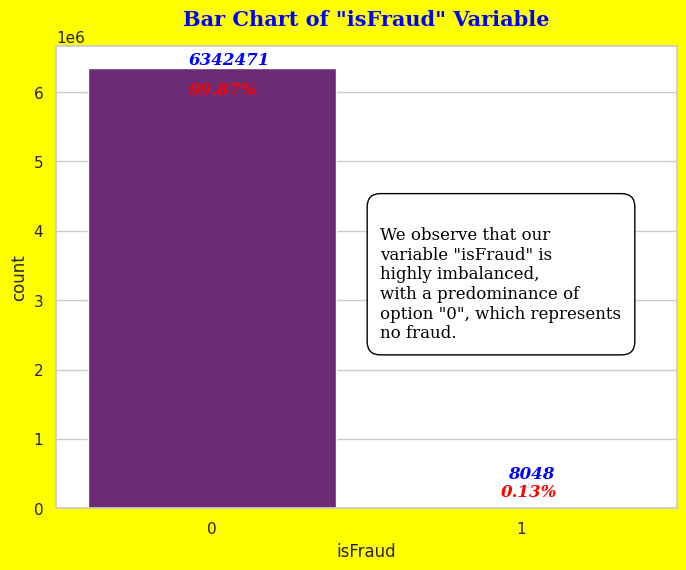

In [150]:
plt.figure(figsize=(8,6))
sns.barplot(x="isFraud", y="count", data= df_grafico, palette = 'magma')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.figtext(0.29, 0.85, 6342471, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'blue'})
plt.figtext(0.29, 0.80, f"{round(df_banco_new.select('isFraud').to_pandas().value_counts()[0]*100/df_banco_new.select('isFraud').shape[0],2)}%",
            fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'red'})

plt.figtext(0.69, 0.16, 8048, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'blue'})
plt.figtext(0.68, 0.13, f"{round(df_banco_new.select('isFraud').to_pandas().value_counts()[1]*100/df_banco_new.select('isFraud').shape[0],2)}%",
            fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'red'})

# Añadir texto de conclusión
conclusion_text = '''
We observe that our
variable "isFraud" is
highly imbalanced,
with a predominance of
option "0", which represents
no fraud.'''

plt.figtext(0.53, 0.5, conclusion_text, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8'))
# plt.text(0.5, 0.95, conclusion_text, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'},
#         va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('isFraud')
plt.title('Bar Chart of "isFraud" Variable', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.show()

### Univariate Analysis: Other Variables

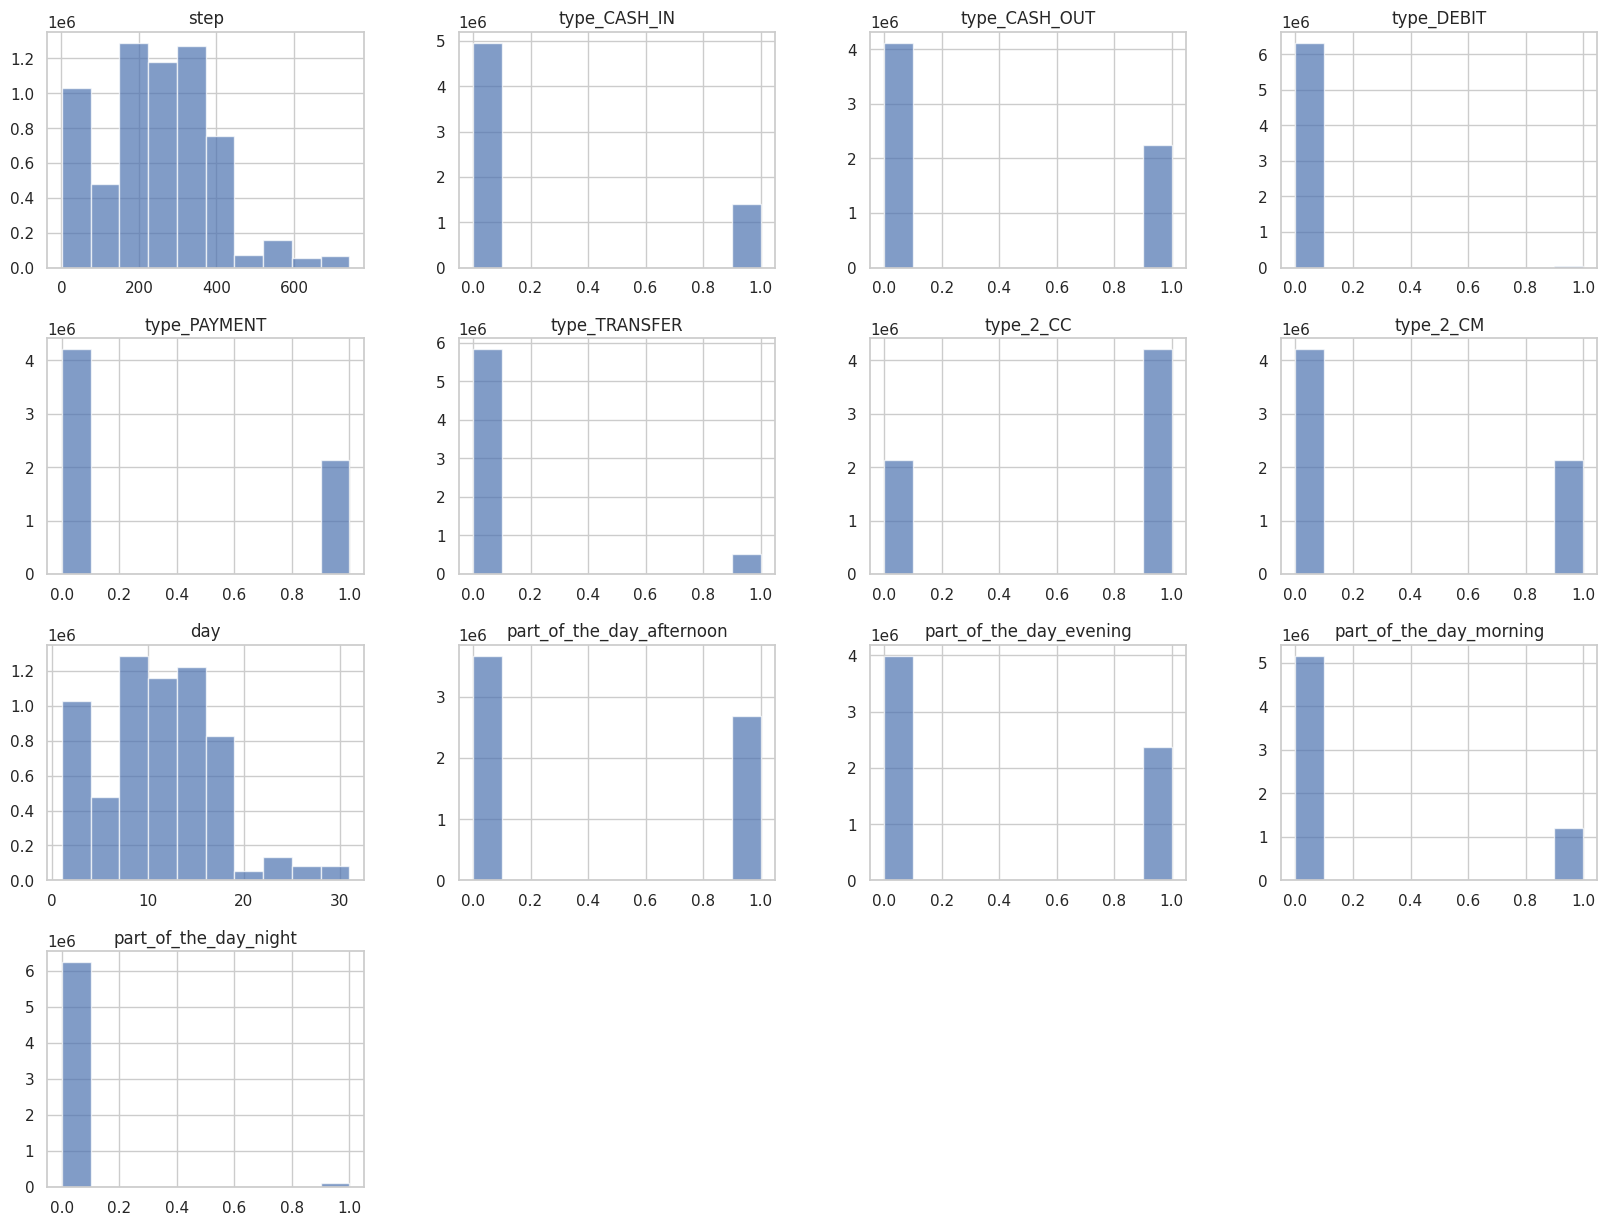

In [151]:
plt.rcParams['figure.figsize'] = [20,15];
sns.set(style="whitegrid")
df_banco_new.drop(['amount', 'isFraud']).to_pandas().hist(alpha=0.7)
plt.show()

* It's mostly observed that transactions start after 6:00 in the morning.
* From the deductions made earlier, we can also conclude that transactions are much fewer during the early hours of the morning.
* A large number of transactions occur in the afternoons and evenings.
* From the histograms regarding transaction methods, we deduce that the PAYMENT and CASH_OUT types are the most used with just over 2,000,000 transactions each.
* The DEBIT type has the fewest records, indicating it's not representative compared to the others.
* The CASH-IN type has approximately 1,500,000 transactions.
* The TRANSFER type has only around 500,000 transactions.
* Regarding the CC and CM variables, it's concluded that we have more records of the CC type, with just over 6,000,000 transactions. The remaining transactions are of type CM.

In [30]:
# df_banco.groupby('type')['type'].count()
df_transaccion = df_banco.groupby('type').count().to_pandas()
df_transaccion

,type,count
0,CASH_OUT,2237500
1,TRANSFER,532909
2,DEBIT,41432
3,CASH_IN,1399284
4,PAYMENT,2151495


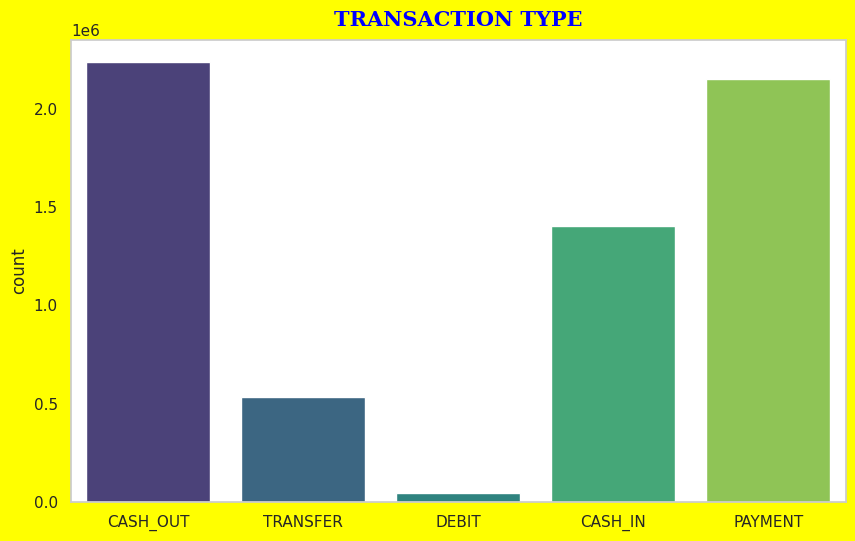

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(x='type', y = 'count', data = df_transaccion, palette = 'viridis')
plt.xlabel('')
plt.title('TRANSACTION TYPE', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
# Set the background color of the plot
plt.gcf().set_facecolor('yellow')
plt.show()

In [31]:
df_intervalo = df_banco.groupby('part_of_the_day').count().to_pandas()
df_intervalo

,part_of_the_day,count
0,night,112605
1,afternoon,2689784
2,morning,1194562
3,evening,2365669


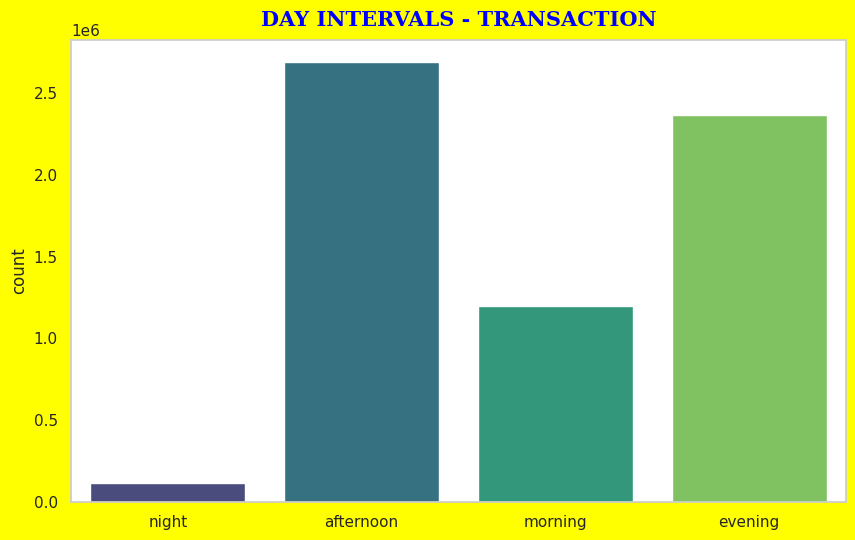

In [153]:
## Bar chart of intervals during the day
plt.figure(figsize=(10,6))
sns.barplot(x='part_of_the_day',y='count',data = df_intervalo, palette = 'viridis')
plt.xlabel('')
plt.title('DAY INTERVALS - TRANSACTION', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
# Set the background color of the plot
plt.gcf().set_facecolor('yellow')
plt.show()

In [32]:
df_dias = df_banco.groupby('day').count().to_pandas()
df_dias

,day,count
0,28,14522
1,13,429335
2,7,420282
3,10,392886
4,24,33349
5,30,11283
6,9,418103
7,15,400706
8,4,21904
9,12,349800


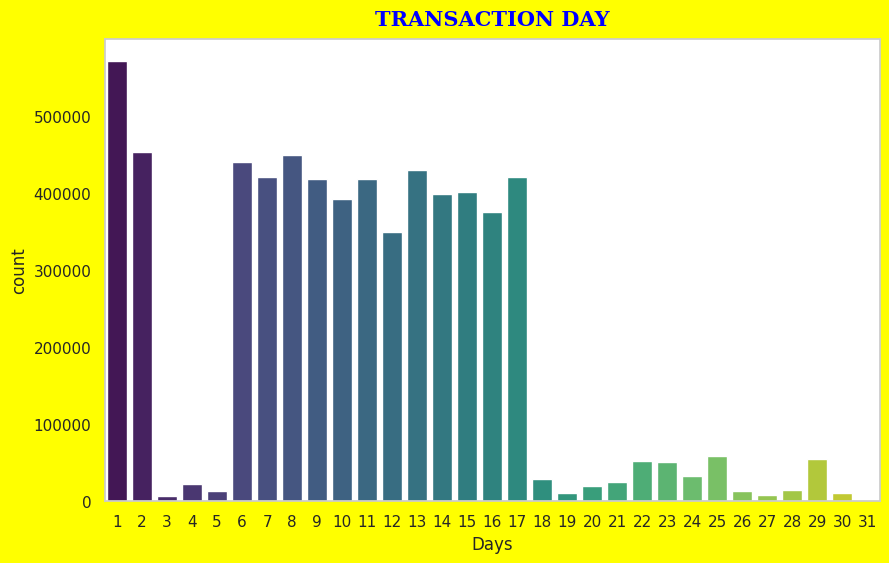

In [154]:
## Bar chart of transaction day
plt.figure(figsize=(10,6))
sns.barplot(x='day',y='count',data= df_dias, palette = 'viridis')
plt.xlabel('Days')
plt.title('TRANSACTION DAY', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
# Set the background color of the plot
plt.gcf().set_facecolor('yellow')
plt.show()

In [33]:
df_transaccion_2 = df_banco.groupby('type_2').count().to_pandas()
df_transaccion_2

,type_2,count
0,CC,4211125
1,CM,2151495


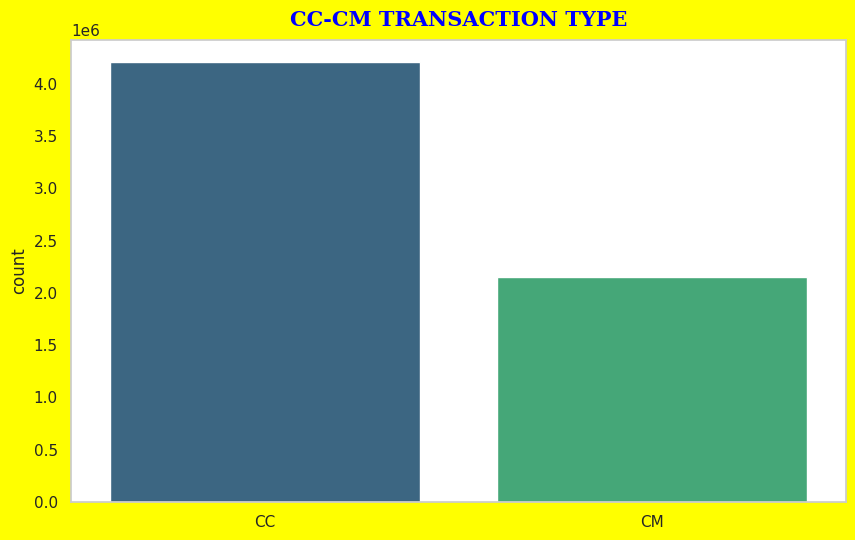

In [155]:
## Bar chart of CC or CM transaction
plt.figure(figsize=(10,6))
sns.barplot(x='type_2',y='count',data= df_transaccion_2, palette = 'viridis')
plt.xlabel('')
plt.title('CC-CM TRANSACTION TYPE', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
# Set the background color of the plot
plt.gcf().set_facecolor('yellow')
plt.show()

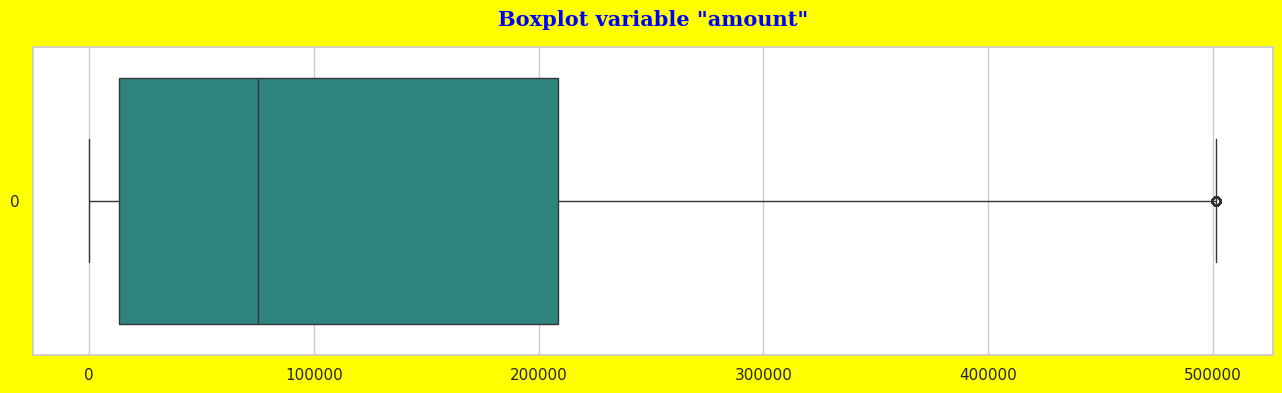

In [156]:
plt.figure(figsize=(16,4))
sns.boxplot(df_banco_new.select('amount'), orient='h', palette = 'viridis')

plt.gcf().set_facecolor('yellow')

# plt.xlabel('amount (Millones MM)')
plt.title('Boxplot variable "amount"', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.show()

Our variable 'amount' represents the amount of each transaction. We notice that there are very high amounts, but the majority of amounts are very small, which indicates the presence of outliers in our boxplot graph. We will analyze this to determine if it is feasible to treat these outliers in order to preserve the value of the data.

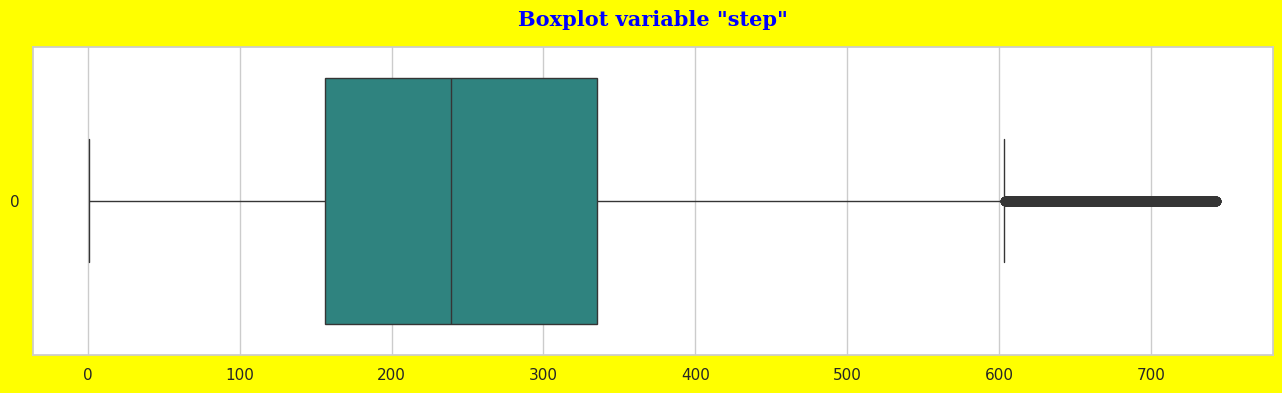

In [157]:
plt.figure(figsize=(16,4))
sns.boxplot(df_banco_new.select('step'), orient='h', palette = 'viridis')

plt.gcf().set_facecolor('yellow')

# plt.xlabel('amount (Millones MM)')
plt.title('Boxplot variable "step"', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.show()

While we notice the presence of outliers in the 'step' variable, we cannot handle their imputation because it is a time indicator in progression. We are even considering the possibility of dispensing with this variable since we have managed to create new variables from it.

**Imputing Outlier Values**
* The outliers we have in the 'amount' variable can introduce certain biases during our model evaluation. Additionally, they can distort the data distribution and reduce the robustness of our machine learning algorithms. Due to all these reasons, we have decided to proceed with the imputation of these outliers.

* We will perform imputation using the Percentile Trimming method.

In [34]:
df_banco_new.describe().to_pandas()

,describe,step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_afternoon,part_of_the_day_evening,part_of_the_day_morning,part_of_the_day_night
0,count,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06
1,null_count,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,mean,2.433990e+02,2.202491e-01,3.522089e-01,6.522931e-03,3.375778e-01,8.344137e-02,1.753265e+05,1.267298e-03,6.624222e-01,3.375778e-01,1.050329e+01,4.225891e-01,3.718280e-01,1.878664e-01,1.771650e-02
3,std,1.423685e+02,4.144146e-01,4.776587e-01,8.050083e-02,4.728838e-01,2.765482e-01,5.643790e+05,3.557657e-02,4.728838e-01,4.728838e-01,5.923629e+00,4.939712e-01,4.832929e-01,3.906055e-01,1.319190e-01
4,min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,25%,1.560000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.343720e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,50%,2.390000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.503816e+04,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,75%,3.350000e+02,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.087005e+05,0.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
8,max,7.430000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.244552e+07,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


As observed in the boxplot graph, the 'amount' variable indeed contains outliers, which we will address through treatment.

In [35]:
df_banco_new.select(['amount', 'step']).describe(percentiles=[0.01,0.025,0.05,0.1,0.5,0.75]).to_pandas()

,describe,amount,step
0,count,6.350519e+06,6.350519e+06
1,null_count,0.000000e+00,0.000000e+00
2,mean,1.753265e+05,2.433990e+02
3,std,5.643790e+05,1.423685e+02
4,min,0.000000e+00,1.000000e+00
5,1%,4.509000e+02,9.000000e+00
6,2%,1.119520e+03,1.200000e+01
7,5%,2.231660e+03,1.600000e+01
8,10%,4.516150e+03,3.500000e+01
9,50%,7.503816e+04,2.390000e+02


In [36]:
df_banco_new.select(['amount', 'step']).describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.98,0.99]).to_pandas()

,describe,amount,step
0,count,6.350519e+06,6.350519e+06
1,null_count,0.000000e+00,0.000000e+00
2,mean,1.753265e+05,2.433990e+02
3,std,5.643790e+05,1.423685e+02
4,min,0.000000e+00,1.000000e+00
5,50%,7.503816e+04,2.390000e+02
6,75%,2.087005e+05,3.350000e+02
7,90%,3.648688e+05,3.990000e+02
8,95%,5.164060e+05,4.920000e+02
9,98%,8.447536e+05,5.850000e+02


We observe that there are many outliers at the upper end for the 'amount' variable. By convention, we will perform the analysis using the IQR=Q3−Q1. Thus, our new upper truncation limit will be P75+1.5×IQR.


In [37]:
list(df_banco_new.select('amount').describe(percentiles=[0.25,0.75]).to_pandas().iloc[5:7,:]['amount'])

[13437.2, 208700.55]

In [38]:
# Getting the upper truncation limit
p25 = list(df_banco_new.select('amount').describe(percentiles=[0.25,0.75]).to_pandas().iloc[5:7,:]['amount'])[0]
p75 = list(df_banco_new.select('amount').describe(percentiles=[0.25,0.75]).to_pandas().iloc[5:7,:]['amount'])[1]
IQR = p75 - p25
LTS = p75 + 1.5*IQR  ## upper truncation limit

In [39]:
pmin = list(df_banco_new.select('amount').describe().to_pandas().iloc[4:5,:]['amount'])[0]
pmin

0.0

In [40]:
# Imputing values using the clip function, bounding between selected percentiles
# df_banco_new['amount'] = np.clip(df_banco_new['amount'], pmin, LTS)
# Apply clip to the 'amount' column
df_banco_new = df_banco_new.with_columns(pl.col("amount").apply(lambda x: min(max(x, pmin), LTS)).alias("amount"))

In [41]:
df_banco_new.select(['amount', 'step']).describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.98,0.99]).to_pandas()

,describe,amount,step
0,count,6.350519e+06,6.350519e+06
1,null_count,0.000000e+00,0.000000e+00
2,mean,1.322395e+05,2.433990e+02
3,std,1.460618e+05,1.423685e+02
4,min,0.000000e+00,1.000000e+00
5,50%,7.503816e+04,2.390000e+02
6,75%,2.087005e+05,3.350000e+02
7,90%,3.648688e+05,3.990000e+02
8,95%,5.015956e+05,4.920000e+02
9,98%,5.015956e+05,5.850000e+02


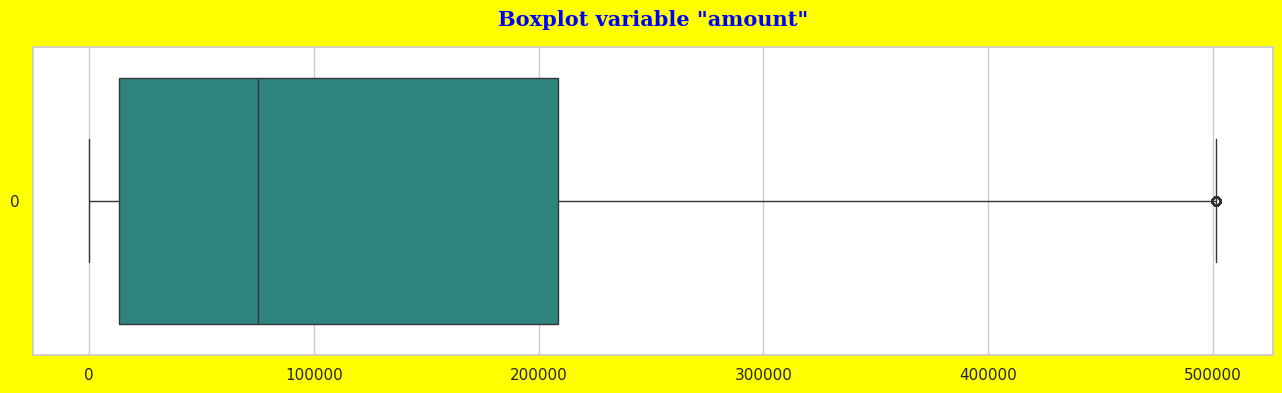

In [158]:
plt.figure(figsize=(16,4))
sns.boxplot(df_banco_new.select('amount'), orient='h', palette = 'viridis')

plt.gcf().set_facecolor('yellow')

# plt.xlabel('amount (Millones MM)')
plt.title('Boxplot variable "amount"', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.show()

We validate in our new boxplot graph that we no longer have the presence of outliers that we had initially. This way, we can handle the data more effectively, avoiding any biases and making our models more robust.

In [42]:
df_banco

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2,day,part_of_the_day
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str,i64,str
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC""",1,"""night"""
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC""",1,"""night"""
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7817.71,"""C90045638""",53860.0,46042.29,"""M573487274""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7107.77,"""C154988899""",183195.0,176087.23,"""M408069119""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7861.64,"""C1912850431""",176087.23,168225.59,"""M633326333""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",4024.36,"""C1265012928""",2671.0,0.0,"""M1176932104""",0.0,0.0,0,0,"""CM""",1,"""night"""


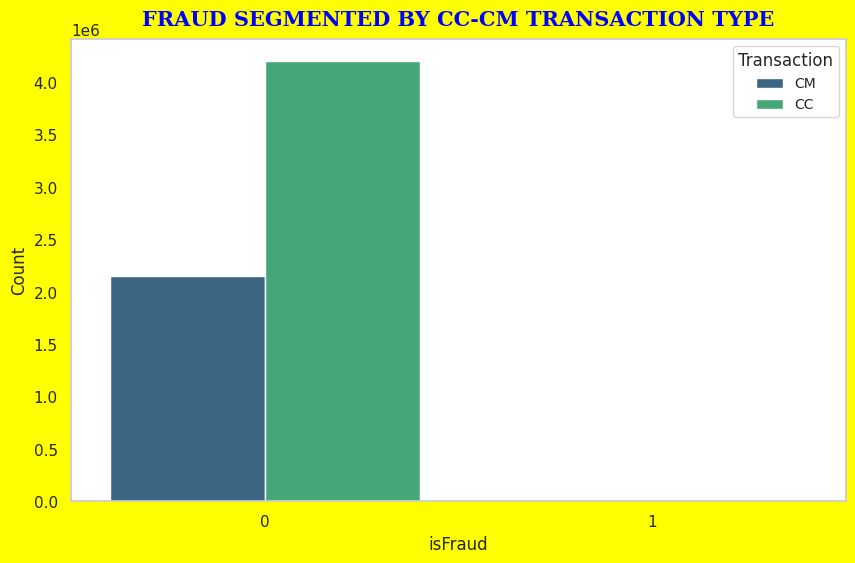

In [159]:
# Create a segmented bar chart by transaction type and fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', hue='type_2', data=df_banco, palette='viridis')
plt.xlabel('isFraud', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('FRAUD SEGMENTED BY CC-CM TRANSACTION TYPE', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Transaction', fontsize=10)
# Set the background color of the plot
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

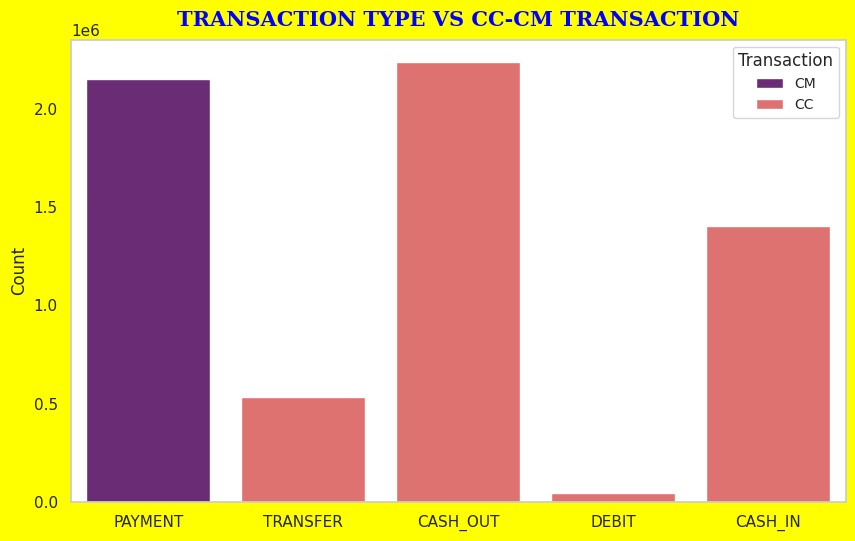

In [160]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='type_2', data=df_banco, palette='magma')
plt.xlabel('', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('TRANSACTION TYPE VS CC-CM TRANSACTION', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Transaction', fontsize=10)
# Set the background color of the plot
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* he CM transaction types are almost entirely for the PAYMENT transaction method.
* CASH_OUT has the highest number of CC transactions.

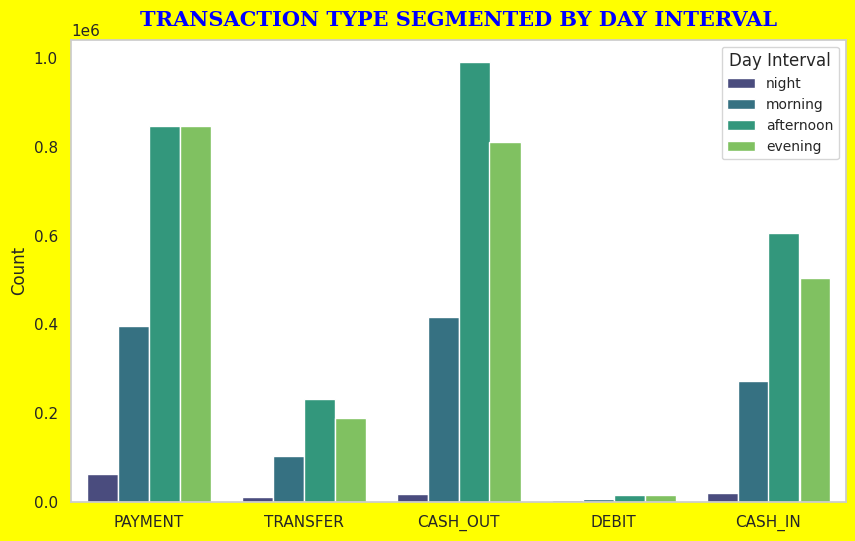

In [161]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='part_of_the_day', data=df_banco, palette='viridis')
plt.xlabel('', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('TRANSACTION TYPE SEGMENTED BY DAY INTERVAL', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Day Interval', fontsize=10)

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* As noted earlier, almost all transactions occur in the AFTERNOON and NIGHT.
* On the other hand, we notice that the PAYMENT transaction method is the one with the most interaction by clients in the early morning.

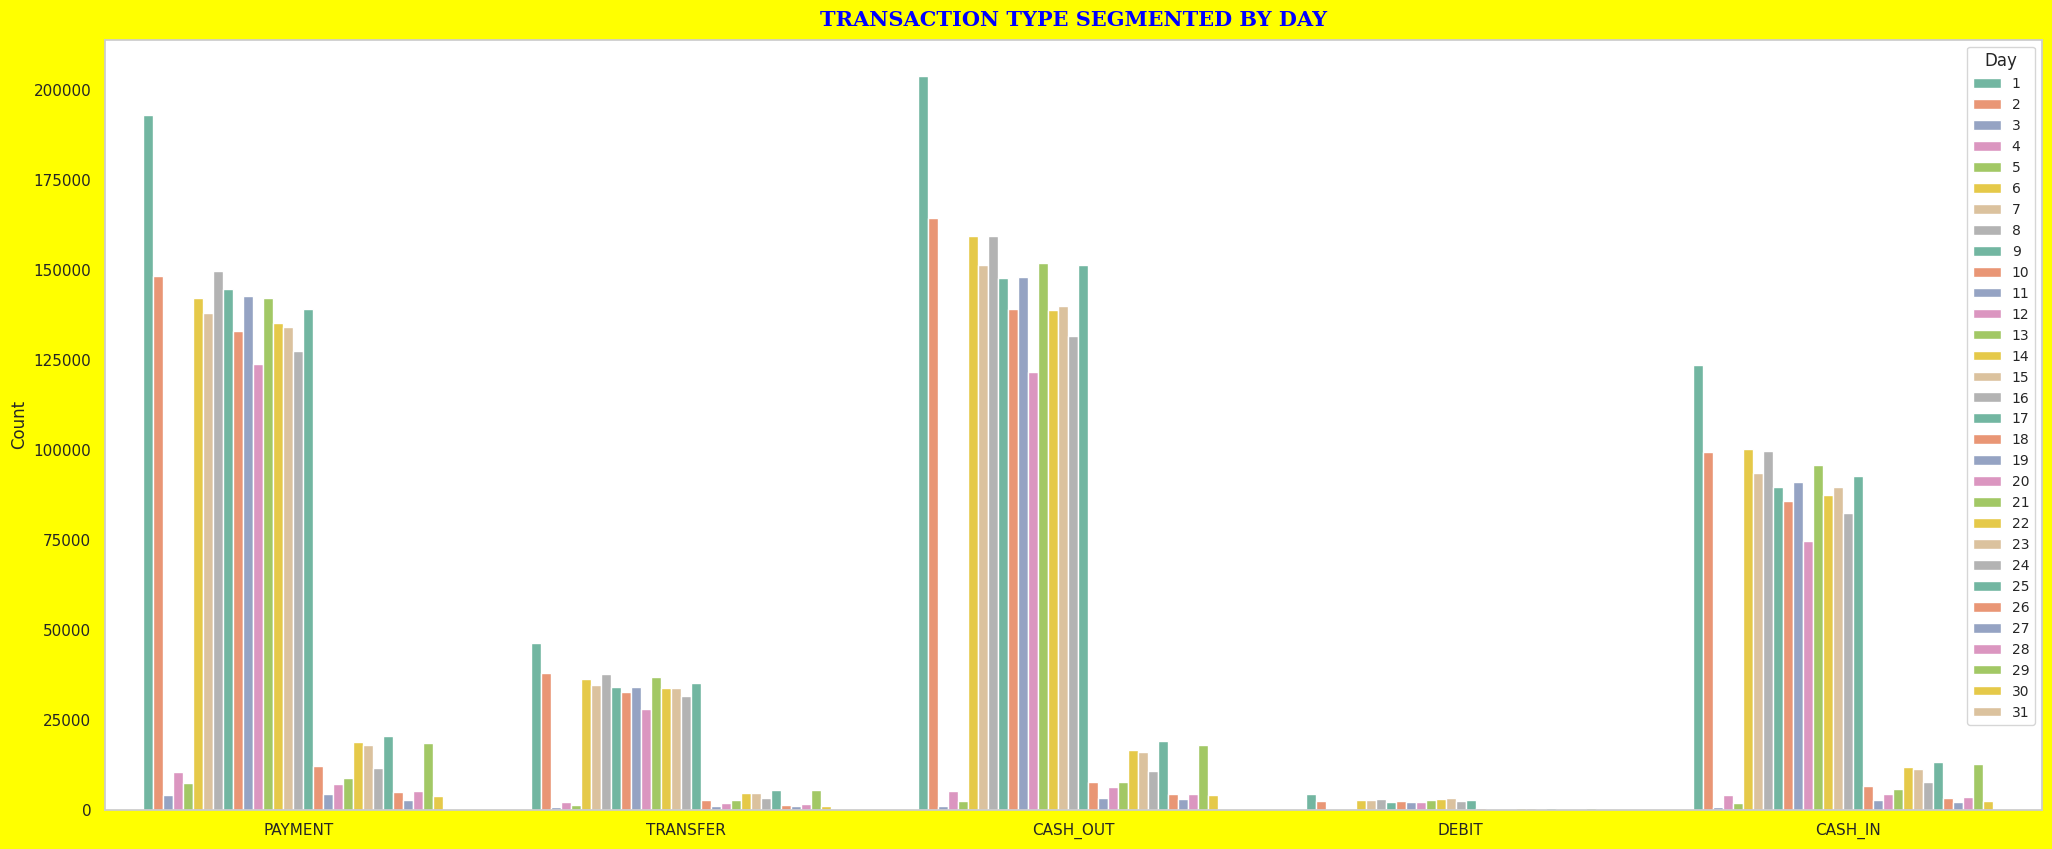

In [162]:
plt.figure(figsize=(25, 10))
sns.countplot(x='type', hue='day', data=df_banco, palette='Set2')
plt.xlabel('', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('TRANSACTION TYPE SEGMENTED BY DAY', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Day', fontsize=10)

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* The first two days were where the highest number of transactions occurred, in quantity per day.
* The interval from day 6 to day 17 saw a considerable and constant number of transactions.
* As noted in other analyses, the DEBIT method had very few transactions compared to the others.
* PAYMENT and CASHOUT are the methods that comprise the largest number of transactions overall.

In [43]:
df_banco.head(20)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2,day,part_of_the_day
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str,i64,str
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC""",1,"""night"""
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC""",1,"""night"""
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7817.71,"""C90045638""",53860.0,46042.29,"""M573487274""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7107.77,"""C154988899""",183195.0,176087.23,"""M408069119""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",7861.64,"""C1912850431""",176087.23,168225.59,"""M633326333""",0.0,0.0,0,0,"""CM""",1,"""night"""
1,"""PAYMENT""",4024.36,"""C1265012928""",2671.0,0.0,"""M1176932104""",0.0,0.0,0,0,"""CM""",1,"""night"""


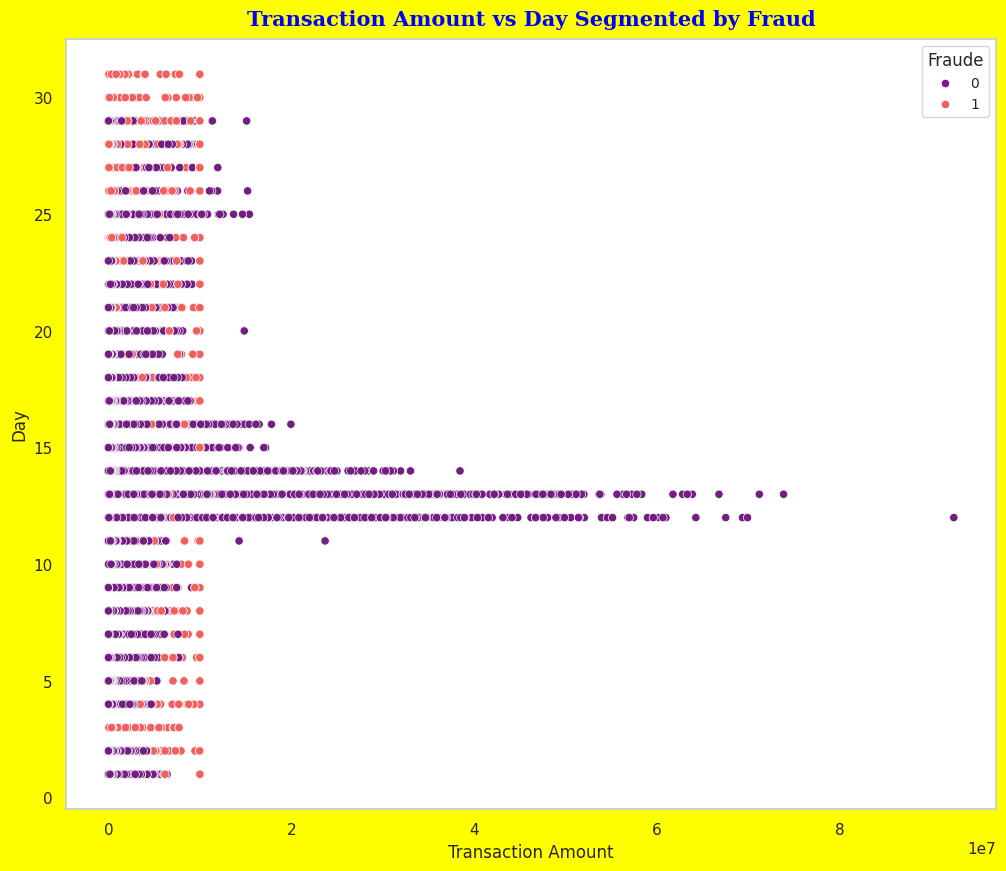

In [163]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='amount', y='day', hue='isFraud', data=df_banco, palette='magma')
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Day', fontsize=12)
plt.title('Transaction Amount vs Day Segmented by Fraud', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Fraude', fontsize=10)

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* We observe that frauds typically occurred in the first days of the month and the last days of the month, which could be understood because many people receive their salaries around those days.
* We notice that the highest fraud amounts are around the value of 1,000,000.
* For very high amounts, we observe that no fraud was recorded. This will be analyzed in detail later.

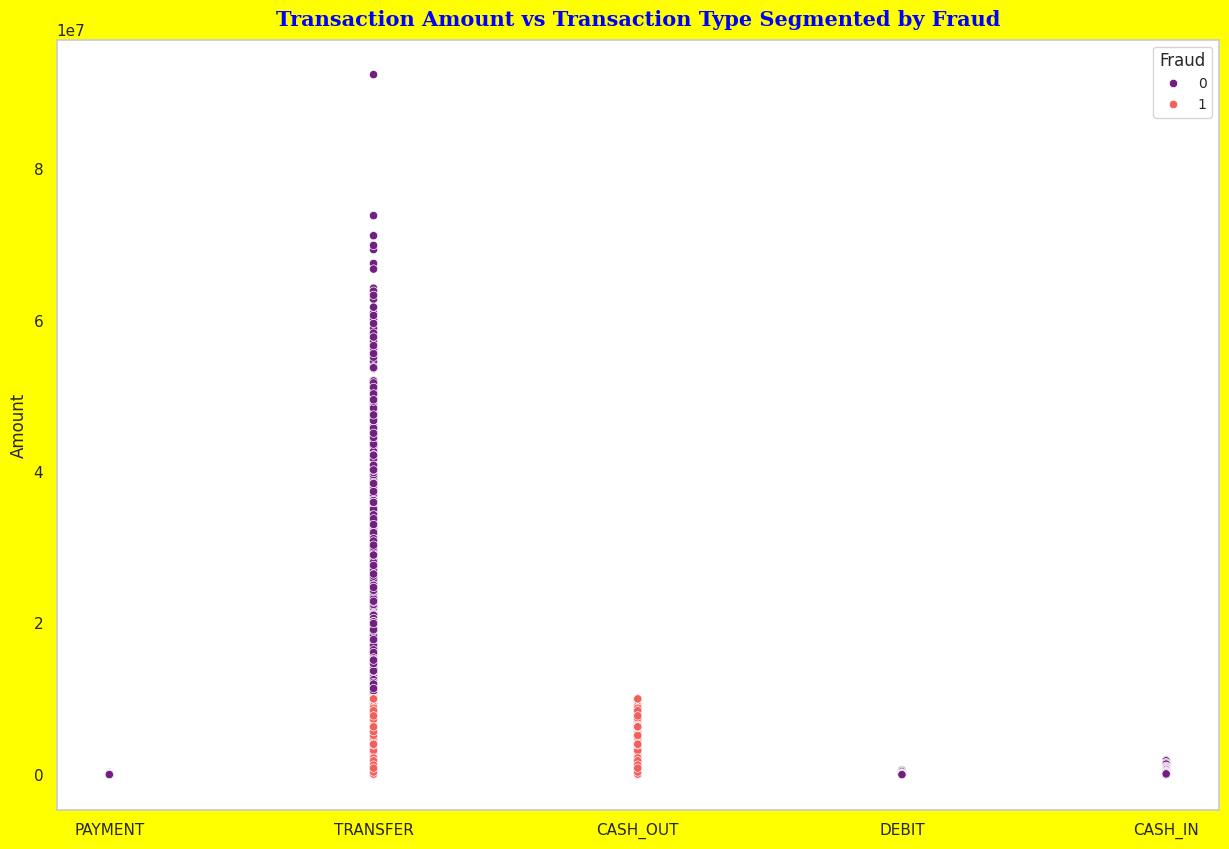

In [164]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='type', y='amount', hue='isFraud', data=df_banco, palette='magma')
plt.xlabel('', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Transaction Amount vs Transaction Type Segmented by Fraud', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Fraud', fontsize=10)

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* There is a significant presence of fraud in the CASH_OUT and TRANSFER transaction methods.
* While PAYMENT and CASHOUT are the most commonly used methods, we notice that they are associated with lower amounts. In contrast, the TRANSFER method, while not the most used, records transactions of very high amounts. It has the highest recorded transaction amount.

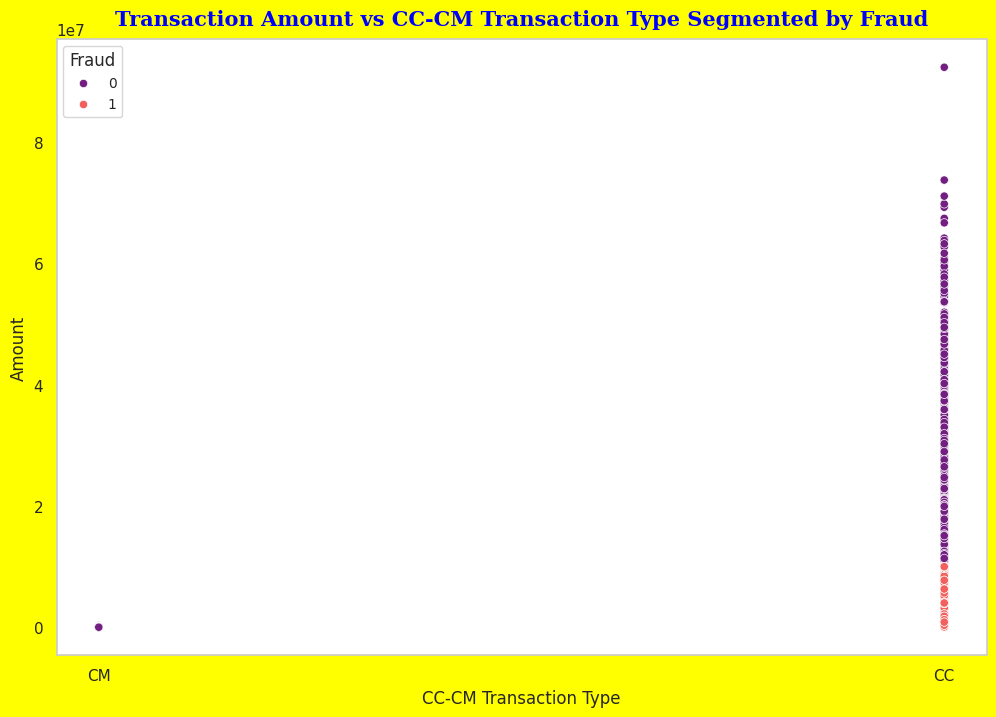

In [165]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='type_2', y='amount', hue='isFraud', data=df_banco, palette='magma')
plt.xlabel('CC-CM Transaction Type', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Transaction Amount vs CC-CM Transaction Type Segmented by Fraud', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Fraud', fontsize=10)

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* We validate that fraud has occurred in the CC transaction type, usually for relatively low amounts, not very high.
* There is no presence of fraud in the CM transaction type.
* Fraud is not observed for very high amounts.

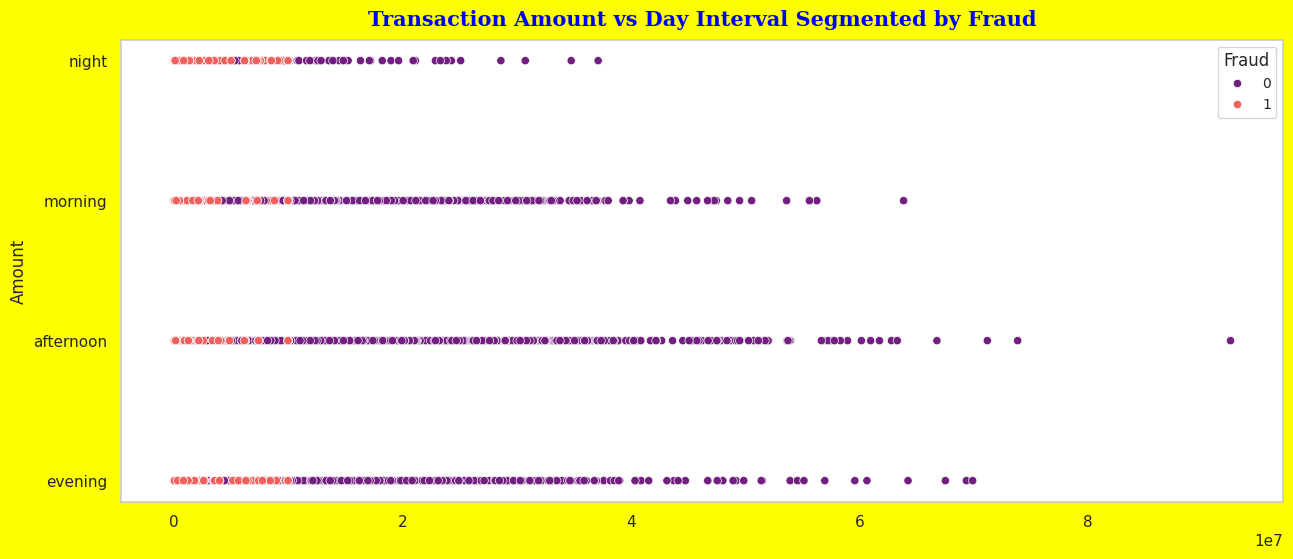

In [166]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='amount', y='part_of_the_day', hue='isFraud', data=df_banco, palette='magma')
plt.xlabel('', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Transaction Amount vs Day Interval Segmented by Fraud', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Fraud', fontsize=10)

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* We observe that fraudulent transactions have occurred in all time intervals of the day.
* There is a slight predominance of fraud at night and in the early morning.
* The largest transaction amount occurred in the afternoon.

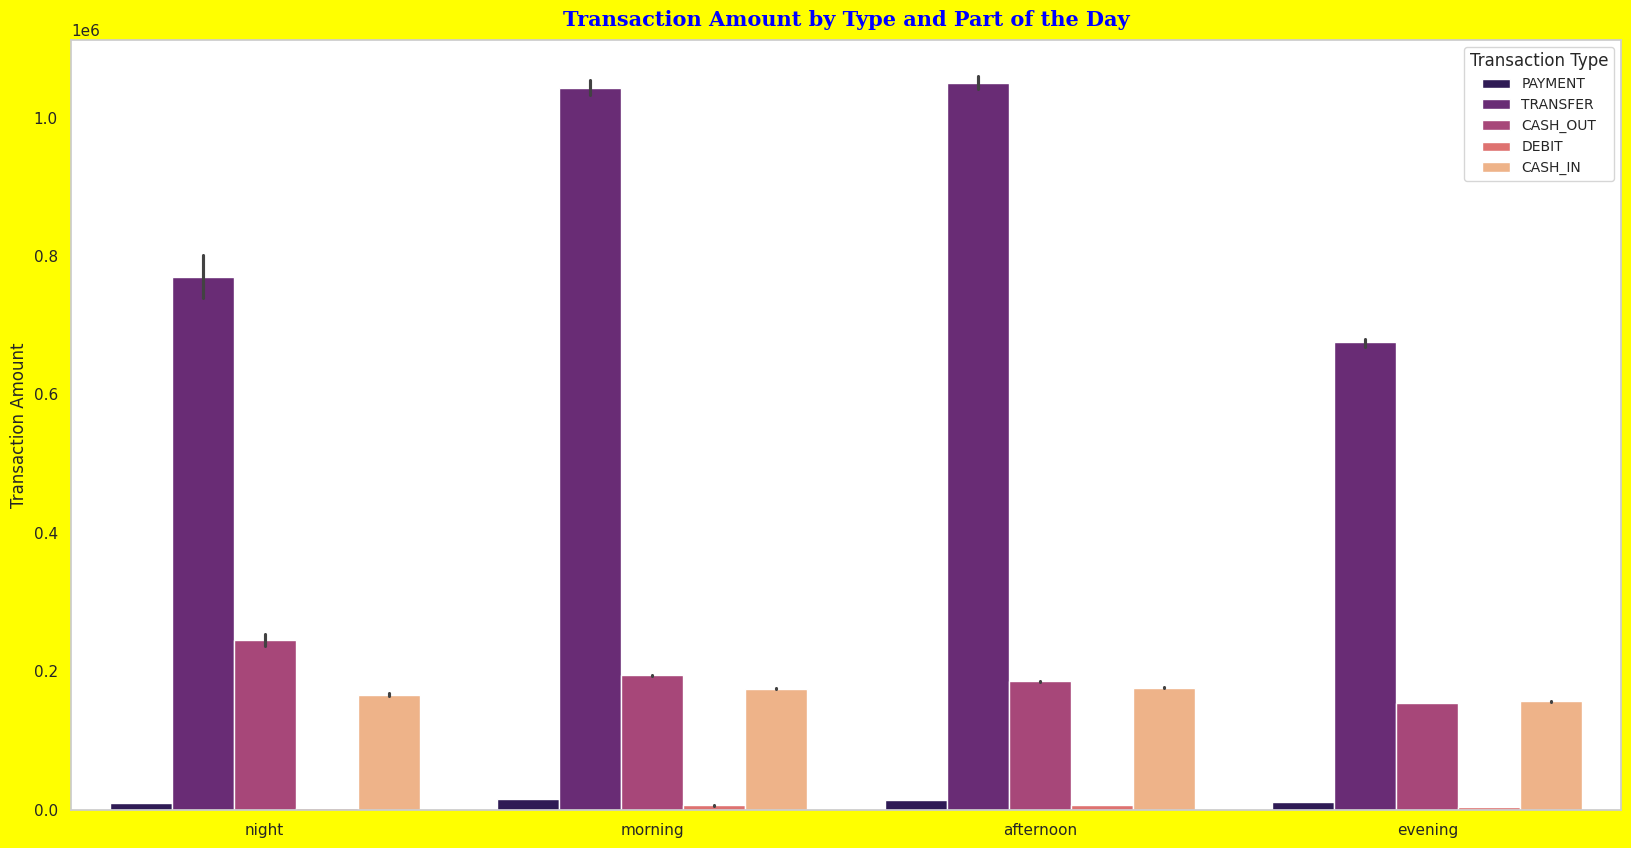

In [167]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_banco, x='part_of_the_day', y='amount', hue='type', palette='magma', dodge=True)

plt.xlabel('', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.title('Transaction Amount by Type and Part of the Day', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Transaction Type', fontsize=10)

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()


* We realize that the transaction types that handle the highest amounts are the * * TRANSFER type (by a significant margin from the rest), CASH_OUT, and CASH_IN.
* The PAYMENT and DEBIT methods record the lowest amounts.
* The highest amounts with the TRANSFER method were made in the morning and in the afternoon.
* Conversely, the highest amounts with the CASHOUT method were made in the early morning.

### Analyzing only the fraud data.

In [44]:
df_banco_amount_fraud = df_banco.filter(pl.col('isFraud') == 1).select(['amount','part_of_the_day', 'type', 'day','type_2']).to_pandas().sort_values(by='amount', ascending=False)
df_banco_amount_fraud.head(288)

,amount,part_of_the_day,type,day,type_2
3162,10000000.00,afternoon,CASH_OUT,12,CC
4596,10000000.00,night,CASH_OUT,18,CC
1817,10000000.00,afternoon,CASH_OUT,7,CC
1816,10000000.00,afternoon,TRANSFER,7,CC
1815,10000000.00,afternoon,CASH_OUT,7,CC
...,...,...,...,...,...
6804,10000000.00,afternoon,CASH_OUT,26,CC
6806,10000000.00,afternoon,CASH_OUT,26,CC
28,10000000.00,night,TRANSFER,1,CC
29,10000000.00,night,CASH_OUT,1,CC


We observe that the highest recorded amounts of fraudulent transactions are 10,000,000, with a total of 287 transactions, and they were recorded in the late afternoon/evening/early morning hours. All of these transactions are of the CC transaction type, and the payment methods are CASH_OUT and TRANSFER.

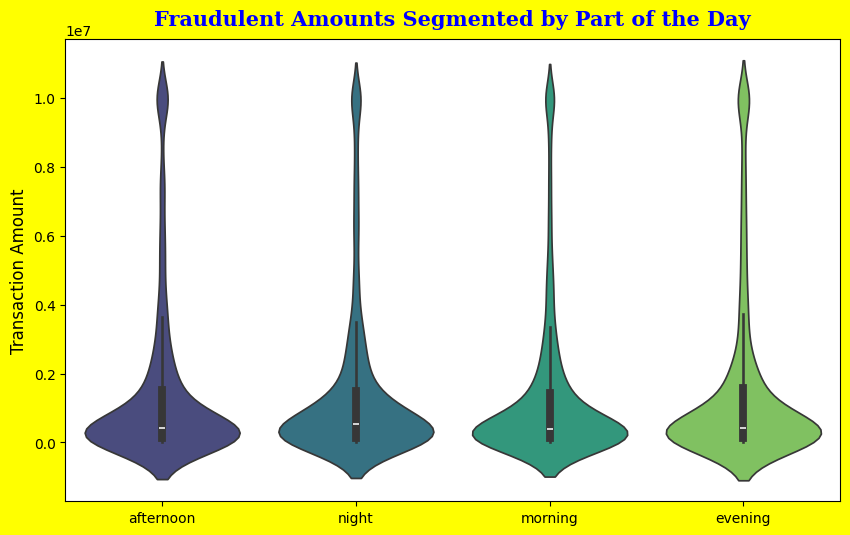

In [45]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_banco_amount_fraud, x='part_of_the_day', y='amount', palette='viridis')
plt.xlabel('', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.title('Fraudulent Amounts Segmented by Part of the Day', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

We notice that frauds tend to occur at various times of the day, but slightly more often in the evening/night/early morning, and the amounts typically range between 0 and 0.4*10^7. However, we see that there are some very high amounts in the range of 10^7.

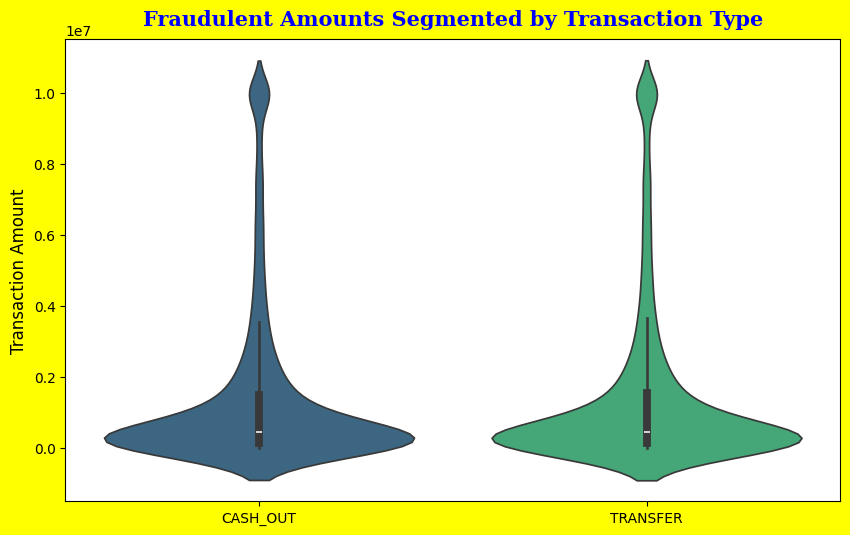

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_banco_amount_fraud, x='type', y='amount', palette='viridis')
plt.xlabel('', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.title('Fraudulent Amounts Segmented by Transaction Type', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

We observe that the fraudulent transaction types are CASH_OUT and TRANSFER. However, we notice that they have a very similar trend, indicating that the same type of fraud is being carried out with these two methods.

In [46]:
df_groupby_type_fraude = df_banco_amount_fraud.groupby(['type','part_of_the_day']).sum().drop(columns=['day','type_2'])
df_groupby_type_fraude

amount
type     part_of_the_day              
CASH_OUT afternoon        1.531342e+09
         evening          1.569504e+09
         morning          1.418263e+09
         night            1.470094e+09
TRANSFER afternoon        1.551035e+09
         evening          1.594283e+09
         morning          1.443881e+09
         night            1.478014e+09

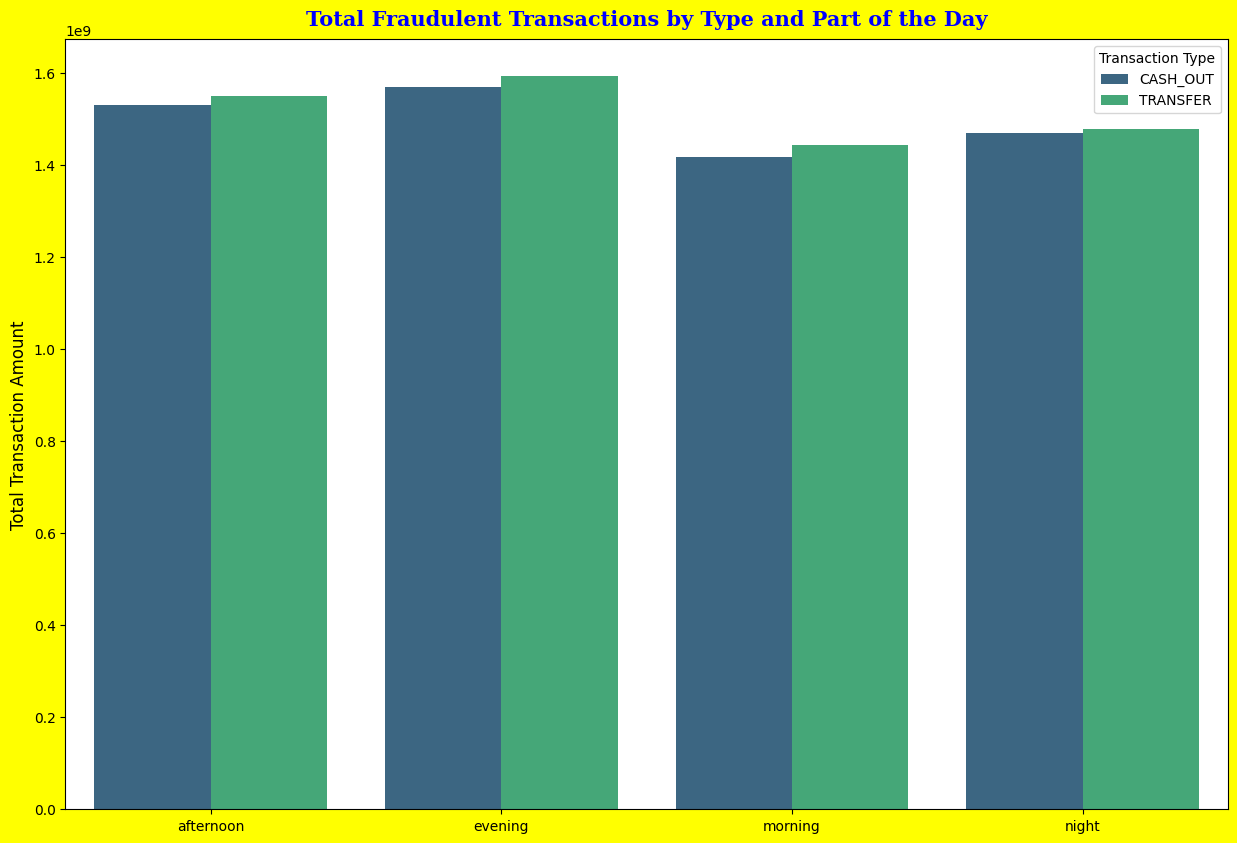

In [47]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_groupby_type_fraude, x='part_of_the_day', y='amount', hue='type', palette='viridis', dodge=True)

# Set labels and title of the plot
plt.xlabel('', fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=12)
plt.title('Total Fraudulent Transactions by Type and Part of the Day', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Transaction Type', fontsize=10)

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

The largest total sums of frauds occurred during the night hours, followed by the afternoon.

In [168]:
df_groupby_type_fraude_count = df_banco_amount_fraud.groupby(['type','part_of_the_day']).count().drop(columns=['day','type_2'])
df_groupby_type_fraude_count

amount
type     part_of_the_day        
CASH_OUT afternoon          1045
         evening            1025
         morning            1047
         night               999
TRANSFER afternoon          1032
         evening            1021
         morning            1047
         night               997

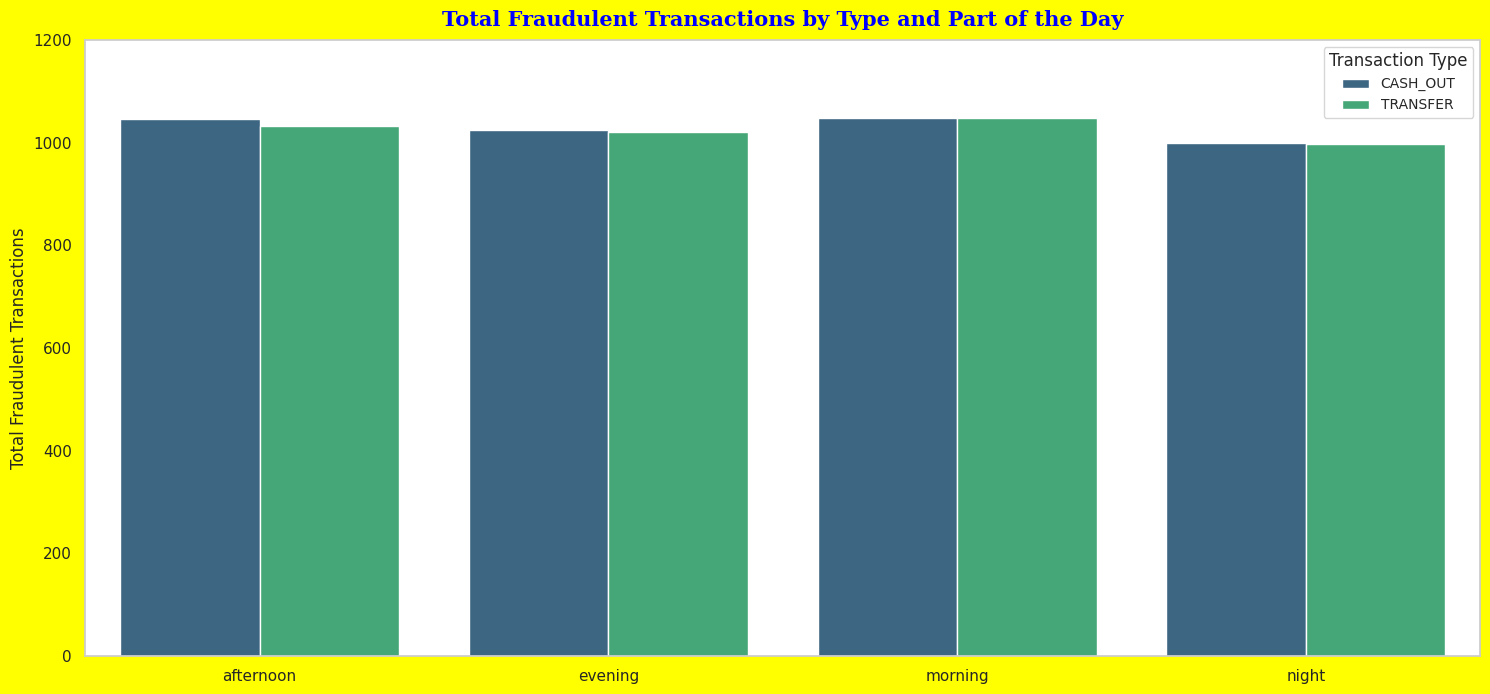

In [169]:
plt.figure(figsize=(18, 8))
sns.barplot(data=df_groupby_type_fraude_count, x='part_of_the_day', y='amount', hue='type', palette='viridis', dodge=True)

# Set labels and title of the plot
plt.xlabel('', fontsize=12)
plt.ylabel('Total Fraudulent Transactions', fontsize=12)
plt.title('Total Fraudulent Transactions by Type and Part of the Day', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Set the y-axis limits
plt.ylim(0, 1200)
plt.legend(title='Transaction Type', fontsize=10)

plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

In [106]:
df_banco_amount_fraud[df_banco_amount_fraud['amount'] == df_banco_amount_fraud['amount'].max()]

,amount,part_of_the_day,type,day,type_2
3162,10000000.0,afternoon,CASH_OUT,12,CC
4596,10000000.0,night,CASH_OUT,18,CC
1817,10000000.0,afternoon,CASH_OUT,7,CC
1816,10000000.0,afternoon,TRANSFER,7,CC
1815,10000000.0,afternoon,CASH_OUT,7,CC
...,...,...,...,...,...
6803,10000000.0,afternoon,TRANSFER,26,CC
6804,10000000.0,afternoon,CASH_OUT,26,CC
6806,10000000.0,afternoon,CASH_OUT,26,CC
28,10000000.0,night,TRANSFER,1,CC


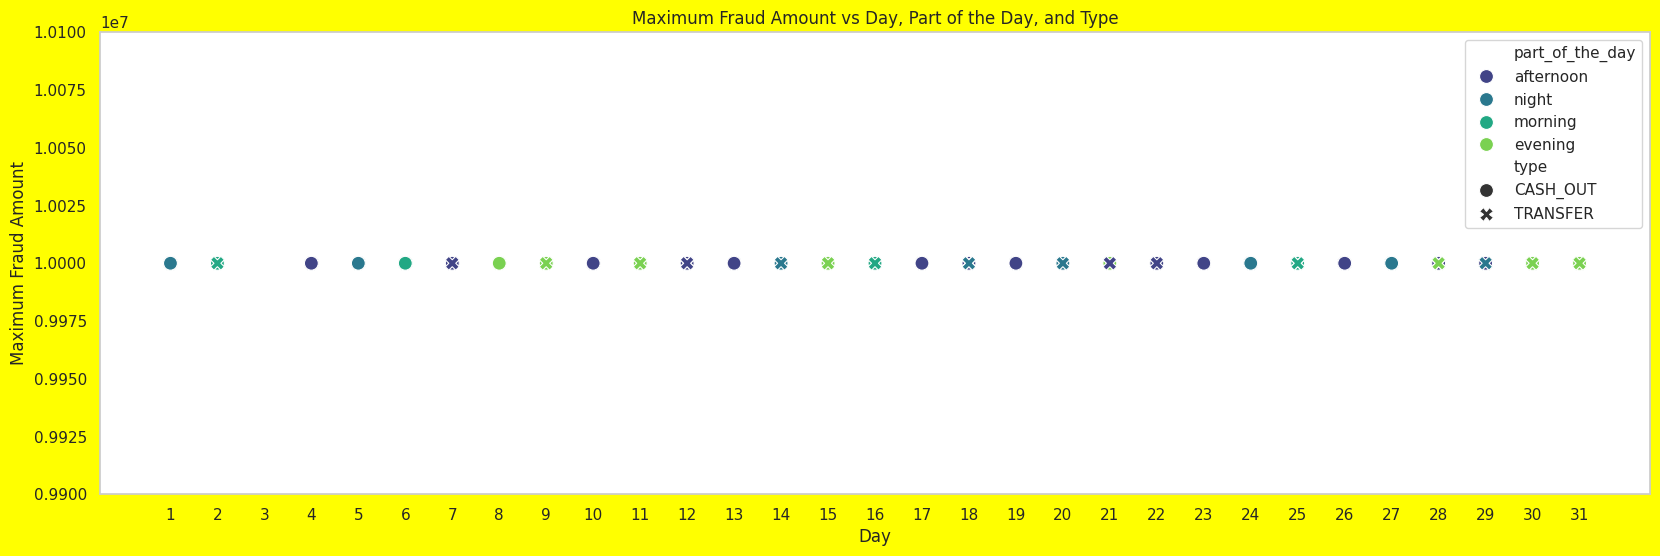

In [170]:
plt.figure(figsize=(20, 6))

# Create a scatter plot to show the amounts by 'part_of_the_day', 'day', and 'type'
sns.scatterplot(data=df_banco_amount_fraud[df_banco_amount_fraud['amount'] == df_banco_amount_fraud['amount'].max()], x='day', y='amount', hue='part_of_the_day', style='type', s=100, palette='viridis')

# Set the y-axis limits
plt.ylim(df_banco_amount_fraud['amount'].max()-100000, df_banco_amount_fraud['amount'].max()+100000)

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Maximum Fraud Amount')
plt.title('Maximum Fraud Amount vs Day, Part of the Day, and Type')

# Show the legend
plt.legend(loc='upper right')
plt.gcf().set_facecolor('yellow')
plt.grid(False)
# Set all x-axis labels
plt.xticks(range(1, 32))

# Show the plot
plt.show()

## Correlation Heatmap Analysis

In [107]:
df_banco_new.corr().to_pandas().set_index(df_banco_new.corr().to_pandas().columns)

,step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_afternoon,part_of_the_day_evening,part_of_the_day_morning,part_of_the_day_night
step,1.000000,0.004028,-0.012917,0.002864,0.005497,0.006042,-0.007599,0.030648,-0.005497,0.005497,0.999539,-0.014415,0.063732,-0.061140,0.001520
type_CASH_IN,0.004028,1.000000,-0.391888,-0.043065,-0.379401,-0.160358,0.128255,-0.018932,0.379401,-0.379401,0.004264,0.010288,-0.013041,0.008428,-0.015701
type_CASH_OUT,-0.012917,-0.391888,1.000000,-0.059748,-0.526383,-0.222481,0.201873,0.011096,0.526383,-0.526383,-0.013006,0.031053,-0.014386,-0.003402,-0.053500
type_DEBIT,0.002864,-0.043065,-0.059748,1.000000,-0.057844,-0.024449,-0.070320,-0.002886,0.057844,-0.057844,0.003165,-0.009034,0.002078,-0.004223,0.038718
type_PAYMENT,0.005497,-0.379401,-0.526383,-0.057844,1.000000,-0.215392,-0.582399,-0.025429,-1.000000,1.000000,0.005175,-0.042057,0.031346,-0.005903,0.060126
type_TRANSFER,0.006042,-0.160358,-0.222481,-0.024449,-0.215392,1.000000,0.475471,0.053528,0.215392,-0.215392,0.006305,0.005493,-0.009814,0.004571,0.001852
amount,-0.007599,0.128255,0.201873,-0.070320,-0.582399,0.475471,1.000000,0.046926,0.582399,-0.582399,-0.005760,0.061423,-0.083902,0.039003,-0.038103
isFraud,0.030648,-0.018932,0.011096,-0.002886,-0.025429,0.053528,0.046926,1.000000,0.025429,-0.025429,0.031642,-0.012374,-0.009007,0.006131,0.061179
type_2_CC,-0.005497,0.379401,0.526383,0.057844,-1.000000,0.215392,0.582399,0.025429,1.000000,-1.000000,-0.005175,0.042057,-0.031346,0.005903,-0.060126
type_2_CM,0.005497,-0.379401,-0.526383,-0.057844,1.000000,-0.215392,-0.582399,-0.025429,-1.000000,1.000000,0.005175,-0.042057,0.031346,-0.005903,0.060126


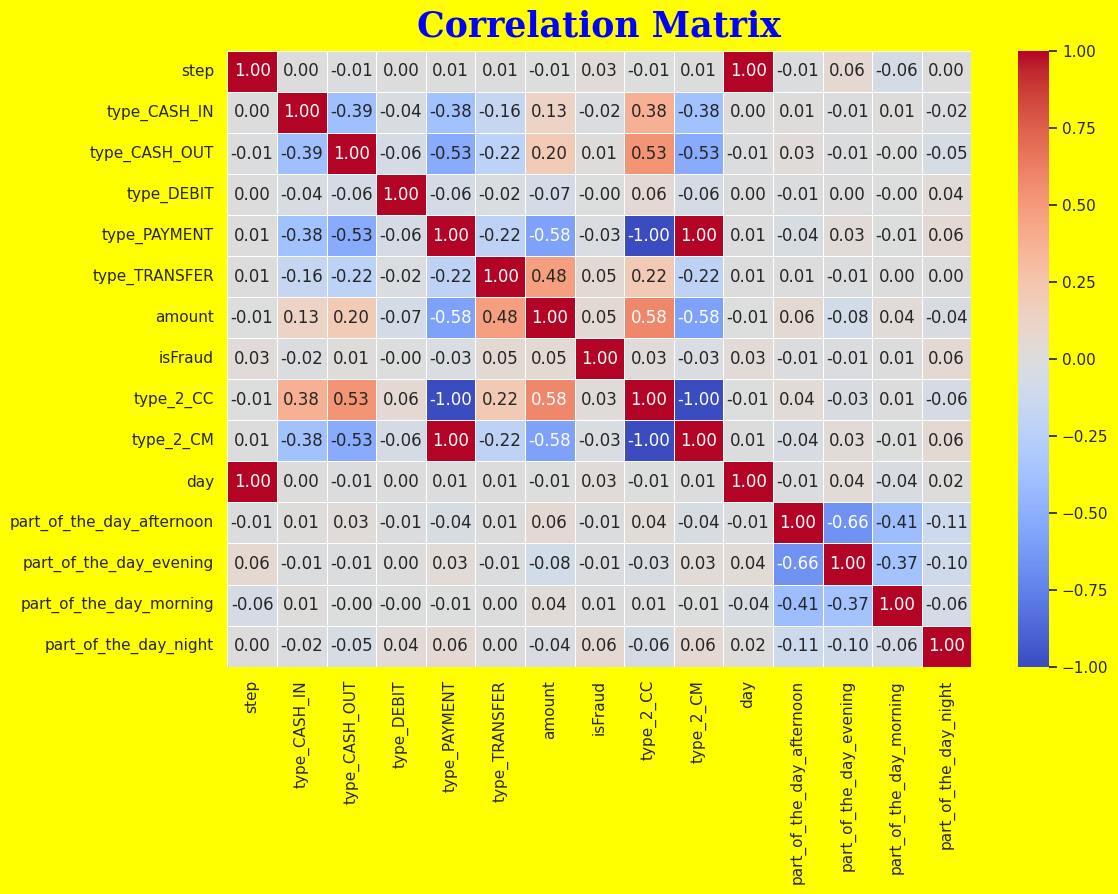

In [108]:
# Correlation between variables
correlation_matrix = df_banco_new.corr().to_pandas().set_index(df_banco_new.corr().to_pandas().columns)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', pad=10, fontdict={'fontsize': 25, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
# Set the background color of the plot
plt.gcf().set_facecolor('yellow')
plt.show()

* Our target variable 'isFraud' has low correlation with the other variables, ideally, we would have a high correlation with the other variables.
* After conducting the data analysis, we concluded that the TRANSFER and CASH_OUT variables are of utmost importance, as fraud was detected in these variables. Conversely, although the CASH_IN and PAYMENT variables have relatively considerable correlation with other important variables such as CC and CM, we decided to keep them because these variables have a large number of transactions but with very low amounts, which could affect the analyses if removed. Finally, the DEBIT variable has low correlation with other variables and also does not correlate with the target variable, so it's not very relevant, and coupled with the fact that it doesn't record many transactions, we decided to eliminate it.
* In this case, MORNING, AFTERNOON, and NIGHT are correlated. However, after conducting our data analysis, we realized that fraud occurs in all these time intervals, so we need to keep these variables for the analyses. On the other hand, the variable DAWN, while having low correlation with the target variable, also shows fraud occurrences during this time, so we will keep it.
* The STEP variable is highly correlated with the DAY variable, and since we have used this variable to generate new variables, we decided to dispense with this variable in this case.
* The DAY variable, while not correlating with the target variable, is considered an important variable for fraud analysis, as different cases occur on different days.
* Furthermore, we see that the CC, CM, PAYMENT, CASH_OUT, CASH_IN, and AMOUNT variables are highly correlated. However, we consider these variables important for analysis as they provide a lot of reference when analyzing whether a transaction is fraudulent or not.

In [109]:
list(df_banco_new.columns)

['step',
 'type_CASH_IN',
 'type_CASH_OUT',
 'type_DEBIT',
 'type_PAYMENT',
 'type_TRANSFER',
 'amount',
 'isFraud',
 'type_2_CC',
 'type_2_CM',
 'day',
 'part_of_the_day_afternoon',
 'part_of_the_day_evening',
 'part_of_the_day_morning',
 'part_of_the_day_night']

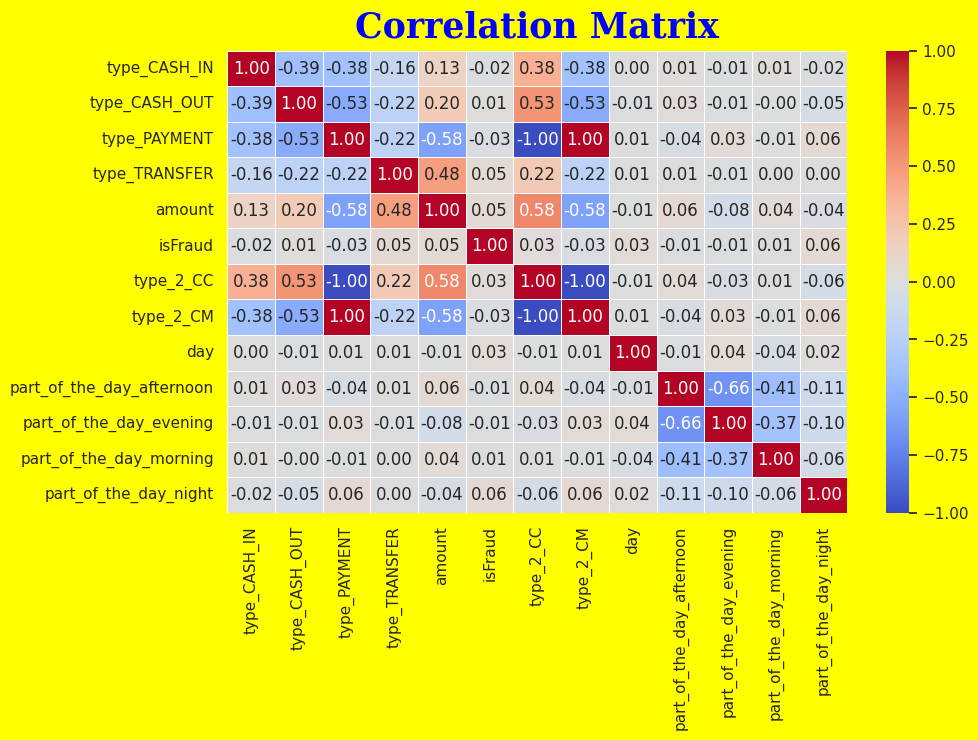

In [110]:
variables_a_eliminar = ['type_DEBIT', 'step']
df_banco_clean = df_banco_new.drop(variables_a_eliminar)

correlation_matrix = df_banco_clean.corr().to_pandas().set_index(df_banco_clean.corr().to_pandas().columns)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', pad=10, fontdict={'fontsize': 25, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

plt.gcf().set_facecolor('yellow')
plt.show()

We notice that there is still some correlation between certain variables. However, we consider these variables important for our future analysis, so we have decided to continue with these variables.

## Data Balancing: Target Variable 'isFraud'

In [111]:
df_banco_balanced = df_banco_clean.clone()
df_banco_balanced.groupby('isFraud').count().to_pandas()

,isFraud,count
0,1,8048
1,0,6342471


In [112]:
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

In [113]:
df_majority = df_banco_balanced.filter(pl.col('isFraud') == 0)
df_minority = df_banco_balanced.filter(pl.col('isFraud') == 1)

In [114]:
df_majority_undersampled = resample(df_majority, replace=False, n_samples=30000, random_state=42)

In [115]:
df_combined = pl.concat([df_majority_undersampled, df_minority])

In [116]:
X_combined = df_combined.drop('isFraud').to_pandas()
y_combined = df_combined.select('isFraud').to_pandas()

In [117]:
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_combined, y_combined)

In [118]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print(df_resampled['isFraud'].value_counts())

isFraud
0    30000
1    30000
Name: count, dtype: int64


In [119]:
df_resampled

,type_CASH_IN,type_CASH_OUT,type_PAYMENT,type_TRANSFER,amount,type_2_CC,type_2_CM,day,part_of_the_day_afternoon,part_of_the_day_evening,part_of_the_day_morning,part_of_the_day_night,isFraud
0,0,1,0,0,270304.010,1,0,6,1,0,0,0,0
1,0,0,1,0,2201.100,0,1,12,1,0,0,0,0
2,0,0,1,0,18972.900,0,1,10,1,0,0,0,0
3,0,1,0,0,193616.950,1,0,17,0,1,0,0,0
4,1,0,0,0,53254.370,1,0,11,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,1,330756.720,1,0,29,0,0,0,1,1
59996,0,0,0,1,501595.575,1,0,6,0,0,1,0,1
59997,0,0,0,1,3372.000,1,0,2,1,0,0,0,1
59998,0,1,0,0,6844.730,1,0,2,0,0,0,1,1


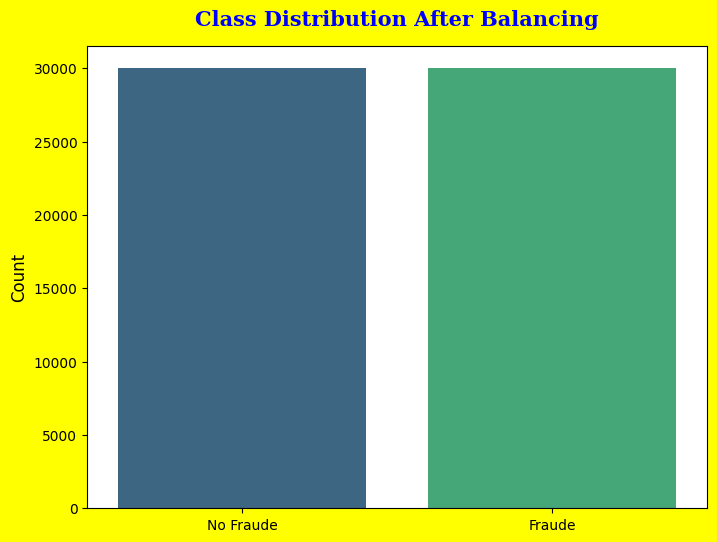

In [ ]:
# Create the bar plot after balancing
plt.figure(figsize=(8, 6))
sns.barplot(x=df_resampled['isFraud'].value_counts().index, y=df_resampled['isFraud'].value_counts().values, palette='viridis')
plt.ylabel('Count', fontsize=12)
plt.xlabel('')
plt.title('Class Distribution After Balancing', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.xticks([0, 1], ['No Fraude', 'Fraude'])

plt.gcf().set_facecolor('yellow')
plt.show()

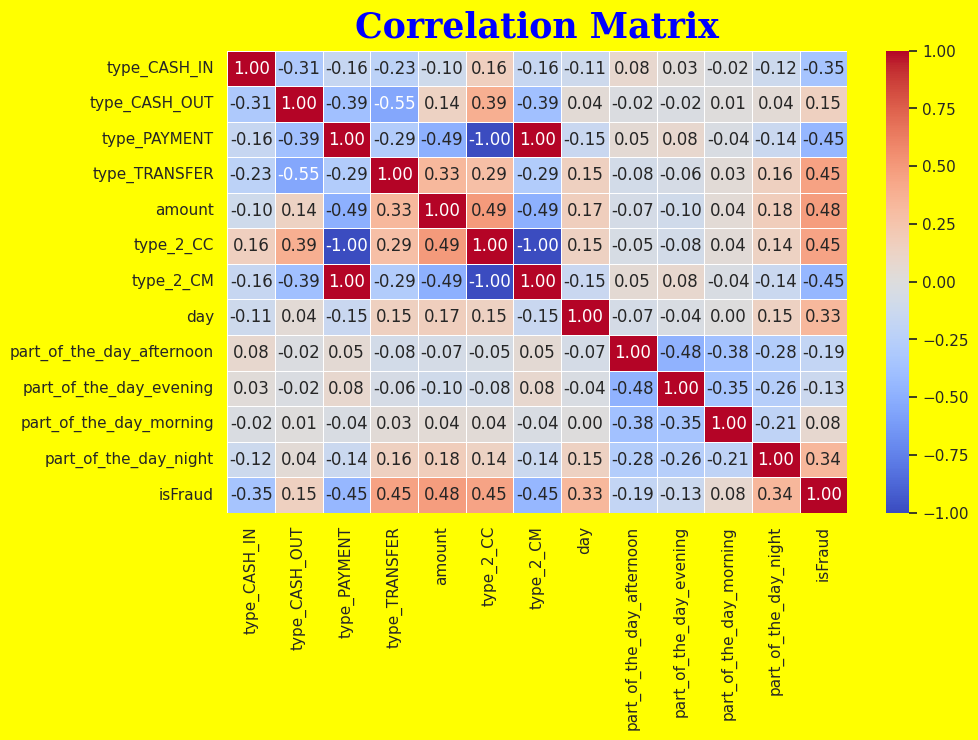

In [120]:
correlation_matrix = df_resampled.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', pad=10, fontdict={'fontsize': 25, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

plt.gcf().set_facecolor('yellow')
plt.show()

We observe that some variables have improved in correlation with the target variable after performing data balancing.

# Model Construction

It's important to choose the appropriate metric when using scikit-learn's GridSearchCV to optimize a model's hyperparameters. Here are some considerations for each metric:

1. **Accuracy:**
   - **When to use it:** When all classes are equally important and class imbalance is not a significant issue.
   - **Example:** Disease diagnosis where all diseases are equally likely and have similar consequences.

2. **ROC AUC (Receiver Operating Characteristic Area Under the Curve):**
   - **When to use it:** In binary classification problems where you're interested in the model's ability to distinguish between positive and negative classes.
   - **Example:** Fraud detection, diagnosis of critical illnesses (where minimizing false negatives is crucial).

3. **F1 Score:**
   - **When to use it:** In binary classification problems with imbalanced classes where you want a balance between precision and recall.
   - **Example:** Spam detection, where both false positives and false negatives have significant consequences.

4. **Precision:**
   - **When to use it:** When the cost of false positives is high.
   - **Example:** Medical diagnosis for a rare disease, where a false positive can lead to unnecessary treatments.

5. **Recall (Sensitivity):**
   - **When to use it:** When the cost of false negatives is high.
   - **Example:** Fraud detection, where a false negative means a fraud case goes undetected.

For cross-validation, the `cv` parameter in GridSearchCV defines the number of partitions (folds) that will be used to train and evaluate the model. For example, `cv=5` means that 5 partitions will be used. This approach provides a more robust estimate of the model's performance by averaging the results of multiple evaluations.

## WITH TOTAL CLASS BALANCING

In [121]:
y = df_resampled['isFraud']
x = df_resampled.drop(columns='isFraud')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 77)

In [122]:
x_train.head()

,type_CASH_IN,type_CASH_OUT,type_PAYMENT,type_TRANSFER,amount,type_2_CC,type_2_CM,day,part_of_the_day_afternoon,part_of_the_day_evening,part_of_the_day_morning,part_of_the_day_night
47165,0,0,0,1,426323.38,1,0,18,0,0,1,0
1137,0,1,0,0,79810.15,1,0,6,1,0,0,0
29890,1,0,0,0,31308.77,1,0,9,0,0,1,0
27977,0,0,1,0,5434.00,0,1,13,0,1,0,0
42340,0,0,0,1,43235.71,1,0,13,1,0,0,0


In [123]:
y_train.head()

47165    1
1137     0
29890    0
27977    0
42340    1
Name: isFraud, dtype: int64

In [124]:
x_train.shape, y_train.shape

((42000, 12), (42000,))

In [125]:
x_test.shape, y_test.shape

((18000, 12), (18000,))

**Standardizing the Data**

In [126]:
standarscaler = StandardScaler()
standarscaler.fit(x_train)

StandardScaler()

In [72]:
x_train_scaled = standarscaler.transform(x_train)
x_test_scaled = standarscaler.transform(x_test)

## Logistic Regression

In [73]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
    'max_iter': [100, 200, 300]
}

# Filter out invalid combinations
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
    {'penalty': ['l2'], 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300], 'l1_ratio': [0, 0.5, 1]},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'max_iter': [100, 200, 300]},
]

### First Approach

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
solvers = ['sag', 'saga', 'lbfgs']
Cs=[0.01, 0.1, 1, 10]

for s in solvers:
    for c in Cs:
        LR = LogisticRegression(C=c, solver=s).fit(x_train_scaled,y_train)
        yhat = LR.predict(x_test_scaled)
        yhat_proba = LR.predict_proba(x_test_scaled)[:,1]
        print("Solver="+s+", C="+str(c)
            +"->Accuracy: "+str(accuracy_score(y_test,yhat))
            +"->Precision: "+str(precision_score(y_test,yhat))
            +"->Recall: "+str(recall_score(y_test,yhat))
            +"->F1-score: "+str(f1_score(y_test,yhat))
            +"->AUC : "+str(roc_auc_score(y_test,yhat_proba)))

Solver=sag, C=0.01->Accuracy: 0.8495555555555555->Precision: 0.8296480847088135->Recall: 0.8822165801964896->F1-score: 0.8551251872458806->AUC : 0.9270855393180539
Solver=sag, C=0.1->Accuracy: 0.8474444444444444->Precision: 0.8297294474041575->Recall: 0.8768075946572469->F1-score: 0.8526191498497209->AUC : 0.9273332166287294
Solver=sag, C=1->Accuracy: 0.8476111111111111->Precision: 0.8299206017551191->Recall: 0.8769179821172315->F1-score: 0.8527722612849552->AUC : 0.9274192944020223
Solver=sag, C=10->Accuracy: 0.8476111111111111->Precision: 0.8299206017551191->Recall: 0.8769179821172315->F1-score: 0.8527722612849552->AUC : 0.927423751383686
Solver=saga, C=0.01->Accuracy: 0.8495555555555555->Precision: 0.8296480847088135->Recall: 0.8822165801964896->F1-score: 0.8551251872458806->AUC : 0.9270858232808746
Solver=saga, C=0.1->Accuracy: 0.8474444444444444->Precision: 0.8297294474041575->Recall: 0.8768075946572469->F1-score: 0.8526191498497209->AUC : 0.927332833896232
Solver=saga, C=1->Accur

In [127]:
model_lr = LogisticRegression(C=1, solver='saga',random_state=42)
model_lr.fit(x_train_scaled, y_train)

LogisticRegression(C=1, random_state=42, solver='saga')

In [128]:
y_pred_lr = model_lr.predict(x_test_scaled)

### Second Approach

In [129]:
from sklearn.model_selection import GridSearchCV
model_lr = LogisticRegression(random_state=42)

# Apply GridSearchCV
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(x_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr = grid_search_lr.best_estimator_

Best hyperparameters for Logistic Regression: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [130]:
model_lr.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [131]:
y_pred_lr = best_lr.predict(x_test_scaled)

### Model Metrics

In [132]:
report_lr = classification_report(y_test, y_pred_lr, target_names=["No Fraud", "Fraud"], output_dict=True)
pd.DataFrame(report_lr).style.background_gradient()

,No Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.887675,0.832975,0.858000,0.860325,0.860145
recall,0.817582,0.897892,0.858000,0.857737,0.858000
f1-score,0.851188,0.864216,0.858000,0.857702,0.857745
support,8941.000000,9059.000000,0.858000,18000.000000,18000.000000


In [133]:
y_proba_test_lr = model_lr.predict_proba(x_test_scaled)[:,1]

In [134]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = report_lr['Fraud']['precision']
recall_lr = report_lr['Fraud']['recall']
f1_lr = report_lr['Fraud']['f1-score']
auc_roc_lr = roc_auc_score(y_test,y_proba_test_lr)
metricas_lr = []
metricas_lr.extend([accuracy_lr,precision_lr,recall_lr,f1_lr,auc_roc_lr])
print('Accuracy:', accuracy_lr)
print('Precision:',precision_lr)
print('Recall:', recall_lr)
print('F1-score:',f1_lr)
print('AUC-ROC:',auc_roc_lr)

Accuracy: 0.858
Precision: 0.8329749103942652
Recall: 0.8978915995142952
F1-score: 0.8642158946026349
AUC-ROC: 0.92741814620453


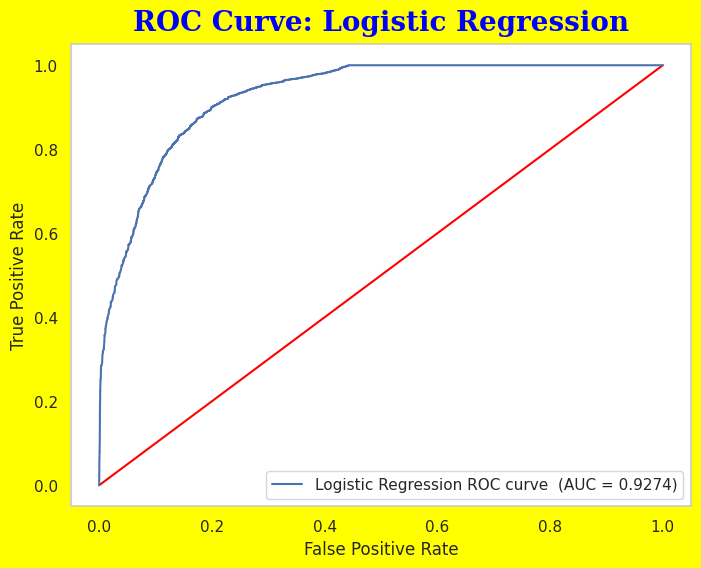

In [135]:
auc_roc_lr = roc_auc_score(y_test,y_proba_test_lr)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test_lr)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'Logistic Regression ROC curve  (AUC = {auc_roc_lr:.4f})'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)

plt.gcf().set_facecolor('yellow')
plt.show()

In [136]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix_lr.ravel()

# Calculate additional metrics
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

# Print the confusion matrix and additional metrics
print("Confusion Matrix:")
print(conf_matrix_lr)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Confusion Matrix:
[[7310 1631]
 [ 925 8134]]
False Positive Rate: 0.18241807404093502
False Negative Rate: 0.10210840048570483


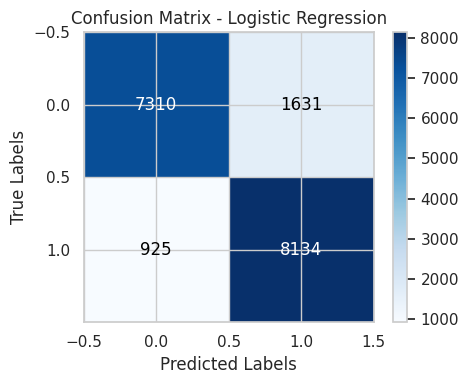

In [137]:
# Configure the figure
plt.figure(figsize=(5, 4))

# Display the confusion matrix as an image
plt.imshow(conf_matrix_lr, interpolation='nearest', cmap=plt.cm.Blues)

# Add axis labels
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add numbers in the cells
thresh = conf_matrix_lr.max() / 2.
for i in range(conf_matrix_lr.shape[0]):
    for j in range(conf_matrix_lr.shape[1]):
        plt.text(j, i, format(conf_matrix_lr[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix_lr[i, j] > thresh else "black")

plt.yticks(np.arange(-0.5, 1.5, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

## Naive Bayes

In [138]:
model_nb = GaussianNB(var_smoothing = 1e-6)
model_nb.fit(x_train_scaled, y_train)

GaussianNB(var_smoothing=1e-06)

In [139]:
y_pred_nb = model_nb.predict(x_test_scaled)

In [140]:
report_nb = classification_report(y_test, y_pred_nb, target_names=["No Fraud", "Fraud"], output_dict=True)
pd.DataFrame(report_nb).style.background_gradient()

,No Fraud,Fraud,accuracy,macro avg,weighted avg
precision,1.000000,0.693910,0.778000,0.846955,0.845952
recall,0.553070,1.000000,0.778000,0.776535,0.778000
f1-score,0.712228,0.819300,0.778000,0.765764,0.766115
support,8941.000000,9059.000000,0.778000,18000.000000,18000.000000


In [141]:
y_proba_test_nb = model_nb.predict_proba(x_test_scaled)[:,1]

In [142]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = report_nb['Fraud']['precision']
recall_nb = report_nb['Fraud']['recall']
f1_nb = report_nb['Fraud']['f1-score']
auc_roc_nb = roc_auc_score(y_test,y_proba_test_nb)
metricas_nb = []
metricas_nb.extend([accuracy_nb,precision_nb,recall_nb,f1_nb,auc_roc_nb])
print('Accuracy:', accuracy_nb)
print('Precision:',precision_nb)
print('Recall:', recall_nb)
print('F1-score:',f1_nb)
print('AUC-ROC:',auc_roc_nb)

Accuracy: 0.778
Precision: 0.6939103791650708
Recall: 1.0
F1-score: 0.8192999909559555
AUC-ROC: 0.9274537650192103


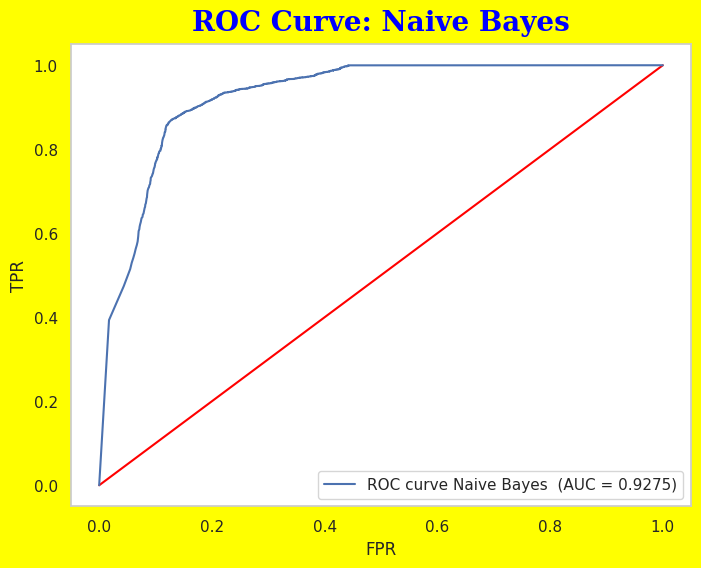

In [143]:
auc_roc_nb = roc_auc_score(y_test,y_proba_test_nb)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test_nb)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'ROC curve Naive Bayes  (AUC = {auc_roc_nb:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve: Naive Bayes',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)

plt.gcf().set_facecolor('yellow')
plt.show()

In [144]:
from sklearn.metrics import confusion_matrix

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

tn, fp, fn, tp = conf_matrix_nb.ravel()

false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("Confusion Matrix:")
print(conf_matrix_nb)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Confusion Matrix:
[[4945 3996]
 [   0 9059]]
False Positive Rate: 0.4469298736159266
False Negative Rate: 0.0


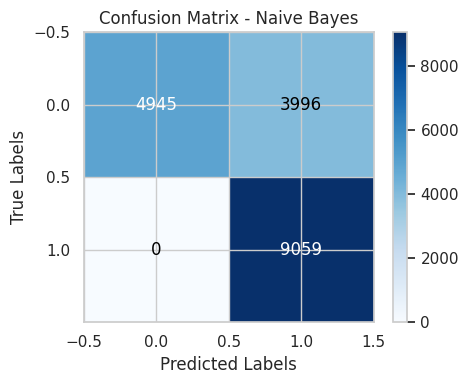

In [145]:
plt.figure(figsize=(5, 4))

plt.imshow(conf_matrix_nb, interpolation='nearest', cmap=plt.cm.Blues)

# Add axis labels
plt.title('Confusion Matrix - Naive Bayes')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

thresh = conf_matrix_nb.max() / 2.
for i in range(conf_matrix_nb.shape[0]):
    for j in range(conf_matrix_nb.shape[1]):
        plt.text(j, i, format(conf_matrix_nb[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix_nb[i, j] > thresh else "black")

plt.yticks(np.arange(-0.5, 1.5, 0.5))

plt.tight_layout()
plt.show()

In [146]:
y_train_proba_nb = model_nb.predict_proba(x_train_scaled)[:,1]
y_test_proba_nb = model_nb.predict_proba(x_test_scaled)[:,1]


train_auc_nb = roc_auc_score(y_train,y_train_proba_nb)
test_auc_nb = roc_auc_score(y_test,y_test_proba_nb)

print(f'train_auc_rf = {train_auc_nb}')
print(f'test_auc_rf = {test_auc_nb}' )
print('\n')

if train_auc_nb - test_auc_nb > 0.1:
  print('The model may be overfitting')
else:
  print('The model does not appear to be overfitting')

train_auc_rf = 0.9299789869769925
test_auc_rf = 0.9274537650192103


The model does not appear to be overfitting


## Support Vector Machine

In [75]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Define the SVM model with specific parameters
model_svm = SVC(C=1, kernel='rbf', probability=True, random_state=42)

# Fit the SVM model
model_svm.fit(x_train_scaled, y_train)

# Make predictions
y_pred_svm = model_svm.predict(x_test_scaled)

# Generate the classification report
report_svm = classification_report(y_test, y_pred_svm, target_names=["No Fraud", "Fraud"], output_dict=True)

# Predict probabilities
y_proba_test_svm = model_svm.predict_proba(x_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = report_svm['Fraud']['precision']
recall_svm = report_svm['Fraud']['recall']
f1_svm = report_svm['Fraud']['f1-score']
auc_roc_svm = roc_auc_score(y_test, y_proba_test_svm)

# Store metrics in a list
metricas_svm = [accuracy_svm, precision_svm, recall_svm, f1_svm, auc_roc_svm]
print('SVM metrics:', metricas_svm)



SVM metrics: [0.8737777777777778, 0.8774329885440997, 0.8708466718180815, 0.8741274238227148, 0.9399406226334245]


In [79]:
report_nb = classification_report(y_test, y_pred_svm, target_names=["No Fraud", "Fraud"], output_dict=True)
pd.DataFrame(report_svm).style.background_gradient()

,No Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.870130,0.877433,0.873778,0.873781,0.873805
recall,0.876748,0.870847,0.873778,0.873797,0.873778
f1-score,0.873426,0.874127,0.873778,0.873777,0.873779
support,8941.000000,9059.000000,0.873778,18000.000000,18000.000000


In [84]:
print('Accuracy:', accuracy_svm)
print('Precision:',precision_svm)
print('Recall:', recall_svm)
print('F1-score:',f1_svm)
print('AUC-ROC:',auc_roc_svm)

Accuracy: 0.8737777777777778
Precision: 0.8774329885440997
Recall: 0.8708466718180815
F1-score: 0.8741274238227148
AUC-ROC: 0.9399406226334245


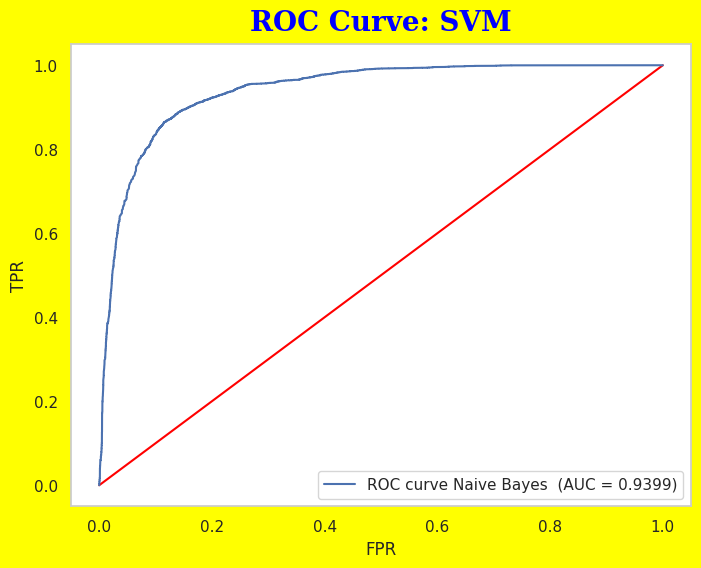

In [87]:
auc_roc_nb = roc_auc_score(y_test,y_proba_test_svm)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test_svm)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'ROC curve Naive Bayes  (AUC = {auc_roc_nb:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve: SVM',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)

plt.gcf().set_facecolor('yellow')
plt.show()

In [81]:
from sklearn.metrics import confusion_matrix

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

tn, fp, fn, tp = conf_matrix_svm.ravel()

false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("Confusion Matrix:")
print(conf_matrix_svm)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Confusion Matrix:
[[7839 1102]
 [1170 7889]]
False Positive Rate: 0.12325243261380159
False Negative Rate: 0.12915332818191855


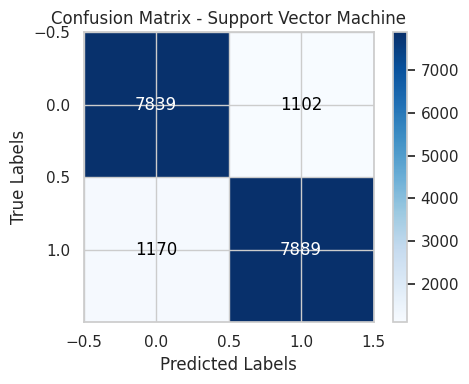

In [82]:
plt.figure(figsize=(5, 4))

plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)

# Add axis labels
plt.title('Confusion Matrix - Support Vector Machine')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

thresh = conf_matrix_svm.max() / 2.
for i in range(conf_matrix_svm.shape[0]):
    for j in range(conf_matrix_svm.shape[1]):
        plt.text(j, i, format(conf_matrix_svm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix_svm[i, j] > thresh else "black")

plt.yticks(np.arange(-0.5, 1.5, 0.5))

plt.tight_layout()
plt.show()

In [83]:
y_train_proba_svm = model_svm.predict_proba(x_train_scaled)[:,1]
y_test_proba_svm = model_svm.predict_proba(x_test_scaled)[:,1]


train_auc_svm = roc_auc_score(y_train,y_train_proba_svm)
test_auc_svm = roc_auc_score(y_test,y_test_proba_svm)

print(f'train_auc_rf = {train_auc_svm}')
print(f'test_auc_rf = {test_auc_svm}' )
print('\n')

if train_auc_svm - test_auc_svm > 0.1:
  print('The model may be overfitting')
else:
  print('The model does not appear to be overfitting')

train_auc_rf = 0.942188146841132
test_auc_rf = 0.9399406226334245


The model does not appear to be overfitting


## Linear Regression

In [98]:
from sklearn.metrics import roc_curve, auc
# Linear Regression
model_linreg = LinearRegression()
model_linreg.fit(x_train_scaled, y_train)

y_pred_linreg = model_linreg.predict(x_test_scaled)
y_pred_linreg = np.where(y_pred_linreg >= 0.5, 1, 0)  # Binary classification

report_linreg = classification_report(y_test, y_pred_linreg, target_names=["No Fraud", "Fraud"], output_dict=True)


# Calculate the probabilities and ROC curve
# Calculate the ROC curve and AUC
fpr_linreg, tpr_linreg, thresholds_linreg = roc_curve(y_test, y_pred_linreg)
roc_auc_linreg = auc(fpr_linreg, tpr_linreg)



accuracy_linreg = accuracy_score(y_test, y_pred_linreg)
precision_linreg = report_linreg['Fraud']['precision']
recall_linreg = report_linreg['Fraud']['recall']
f1_linreg = report_linreg['Fraud']['f1-score']
auc_roc_linreg = roc_auc_score(y_test, y_pred_linreg)

metricas_linreg = [accuracy_linreg, precision_linreg, recall_linreg, f1_linreg, auc_roc_linreg]
print('Linear Regression metrics:', metricas_linreg)


Linear Regression metrics: [0.8525, 0.8159660548648116, 0.9127939066122088, 0.8616683165737509, 0.8521021316977831]


In [93]:
report_linreg = classification_report(y_test, y_pred_linreg, target_names=["No Fraud", "Fraud"], output_dict=True)
pd.DataFrame(report_linreg).style.background_gradient()

,No Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.899568,0.815966,0.852500,0.857767,0.857493
recall,0.791410,0.912794,0.852500,0.852102,0.852500
f1-score,0.842030,0.861668,0.852500,0.851849,0.851914
support,8941.000000,9059.000000,0.852500,18000.000000,18000.000000


In [94]:
print('Accuracy:', accuracy_linreg)
print('Precision:',precision_linreg)
print('Recall:', recall_linreg)
print('F1-score:',f1_linreg)
print('AUC-ROC:',auc_roc_linreg)

Accuracy: 0.8525
Precision: 0.8159660548648116
Recall: 0.9127939066122088
F1-score: 0.8616683165737509
AUC-ROC: 0.8521021316977831


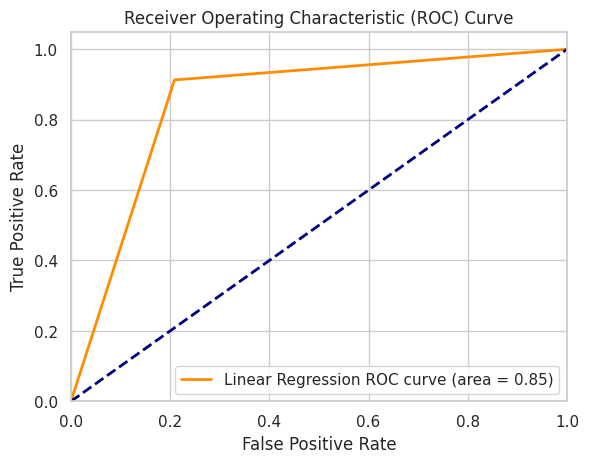

In [99]:
plt.figure()
plt.plot(fpr_linreg, tpr_linreg, color='darkorange', lw=2, label=f'Linear Regression ROC curve (area = {roc_auc_linreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [100]:
from sklearn.metrics import confusion_matrix

conf_matrix_linreg = confusion_matrix(y_test, y_pred_linreg)

tn, fp, fn, tp = conf_matrix_linreg.ravel()

false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("Confusion Matrix:")
print(conf_matrix_linreg)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Confusion Matrix:
[[7076 1865]
 [ 790 8269]]
False Positive Rate: 0.20858964321664245
False Negative Rate: 0.08720609338779114


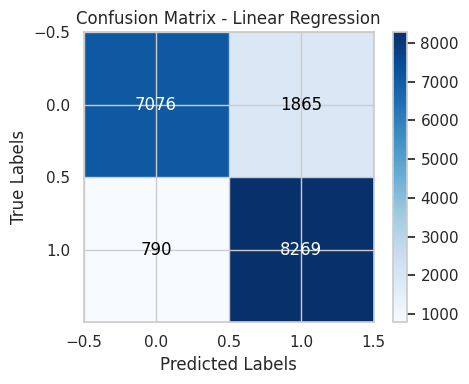

In [101]:
plt.figure(figsize=(5, 4))

plt.imshow(conf_matrix_linreg, interpolation='nearest', cmap=plt.cm.Blues)

# Add axis labels
plt.title('Confusion Matrix - Linear Regression')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

thresh = conf_matrix_linreg.max() / 2.
for i in range(conf_matrix_linreg.shape[0]):
    for j in range(conf_matrix_linreg.shape[1]):
        plt.text(j, i, format(conf_matrix_linreg[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix_linreg[i, j] > thresh else "black")

plt.yticks(np.arange(-0.5, 1.5, 0.5))

plt.tight_layout()
plt.show()

# Model Evaluation and Selection

In [103]:
modelos = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes', 'Linear Regression']
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

In [147]:
comparativo_metricas = pd.DataFrame({
    'Metrics': metricas,
     modelos[0]: metricas_lr,
     modelos[1]: metricas_svm,
     modelos[2]: metricas_nb,
     modelos[3]: metricas_linreg
})
comparativo_metricas.style.background_gradient()

,Metrics,Logistic Regression,Support Vector Machine,Naive Bayes,Linear Regression
0,Accuracy,0.858000,0.873778,0.778000,0.852500
1,Precision,0.832975,0.877433,0.693910,0.815966
2,Recall,0.897892,0.870847,1.000000,0.912794
3,F1-Score,0.864216,0.874127,0.819300,0.861668
4,AUC,0.927418,0.939941,0.927454,0.852102


In [148]:
comparativo_metricas.melt(id_vars='Metrics').style.background_gradient()

,Metrics,variable,value
0,Accuracy,Logistic Regression,0.858000
1,Precision,Logistic Regression,0.832975
2,Recall,Logistic Regression,0.897892
3,F1-Score,Logistic Regression,0.864216
4,AUC,Logistic Regression,0.927418
5,Accuracy,Support Vector Machine,0.873778
6,Precision,Support Vector Machine,0.877433
7,Recall,Support Vector Machine,0.870847
8,F1-Score,Support Vector Machine,0.874127
9,AUC,Support Vector Machine,0.939941


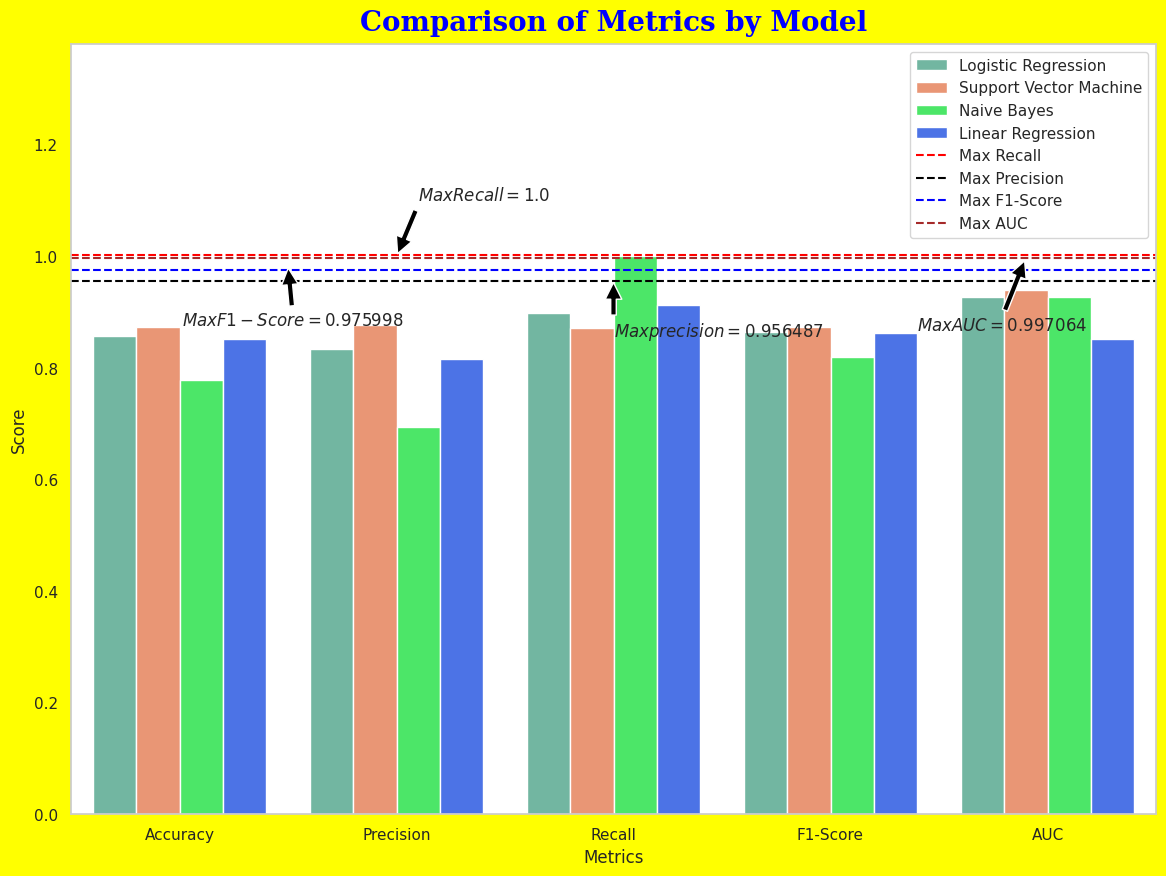

In [149]:
plt.figure(figsize=(14, 10))
colors = ['#66c2a5', '#fc8d62',"#33FF57", "#3366FF"]
sns.barplot(data=comparativo_metricas.melt(id_vars='Metrics'), x='Metrics', y='value', hue='variable', palette=colors)
plt.xlabel('Metrics')
plt.ylabel('Score')
ax = plt.gca()  # Get the axes object
ax.set_ylim(bottom=0, top=1.38)
plt.axhline(y=1.002, color='red', linestyle='--', label='Max Recall')
plt.axhline(y=0.956487, color='black', linestyle='--', label='Max Precision')
plt.axhline(y=0.975998, color='blue', linestyle='--', label='Max F1-Score')
plt.axhline(y=0.997064, color='brown', linestyle='--', label='Max AUC')
plt.annotate('$Max Recall = 1.0$', xy=(1, 1), xytext=(1.1, 1+0.1),fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Max precision = 0.956487$', xy=(2, 0.956487), xytext=(2, 0.956487-0.1),fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Max F1-Score = 0.975998$', xy=(0.5, 0.975998+0.007), xytext=(0.01, 0.975998-0.10),fontsize=12,
                                        arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Max AUC = 0.997064$', xy=(3.9, 0.997064), xytext=(3.4, 0.997064-0.13),fontsize=12,
                                        arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Comparison of Metrics by Model', pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
# Set the background color of the plot
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.legend();

## Conclusion from evaluation:

**Logistic Regression:**

Moderate performance in terms of precision, recall, and F1-Score, with values around 85%.
Reasonably good AUC value, around 93%, indicating acceptable model capability to distinguish between classes.

**Naive Bayes:**

Although it has 100% recall, indicating no false negatives are missed, its other metrics (precision, F1-Score) are considerably lower than other models.
Precision is the lowest among all models, indicating a tendency to incorrectly classify positive cases as negative (false positives).
Acceptable performance in terms of recall and AUC, with values of 100% and around 93%, respectively.
However, its precision and F1-Score are lower compared to other models, indicating less capability to correctly classify classes.

**Support Vector Machine (SVM):**

SVM exhibits robust performance across various metrics, boasting an accuracy of approximately 87.38%. Its precision, standing at around 87.74%, indicates a strong ability to correctly classify positive cases. The model also demonstrates commendable recall, at approximately 87.08%, reflecting its capacity to identify true positives effectively. The F1-score, measuring the balance between precision and recall, is notably high at around 87.41%. Additionally, the AUC-ROC value of approximately 93.99% highlights the model's excellent discriminatory ability between classes.

**Linear Regression:**

Linear regression demonstrates a decent level of accuracy, with a value of approximately 85.25%. However, its precision is somewhat lower compared to other models, standing at around 81.60%. Despite this, it showcases commendable recall at approximately 91.28%, indicating its ability to effectively identify true positives. The F1-score, a harmonic mean of precision and recall, is relatively high at around 86.17%. The model's AUC-ROC value is consistent with its accuracy, standing at approximately 85.21%, demonstrating its capability to distinguish between classes reasonably well.

These conclusions provide a comprehensive overview of the performance of each model, highlighting their strengths and areas for potential improvement.